![image](flower_design_by_AI.png)


# Phyllotaxis: draw flowers using mathematics

## 📖 Background

Mathematics can describe many phenomena of the natural world. Excellent examples are the shape of snowflakes, the fractal geometry of Romanesco broccoli, and how self-similarity rules the growth of plants. In this competition, you will design floral patterns using scatter plots!

You don't need any mathematical background to participate in this competition, but if you want to know more about phyllotaxis, you can check out <a href="https://en.wikipedia.org/wiki/Phyllotaxis" target="_blank">this article on Wikipedia</a>.

## Competition submission:

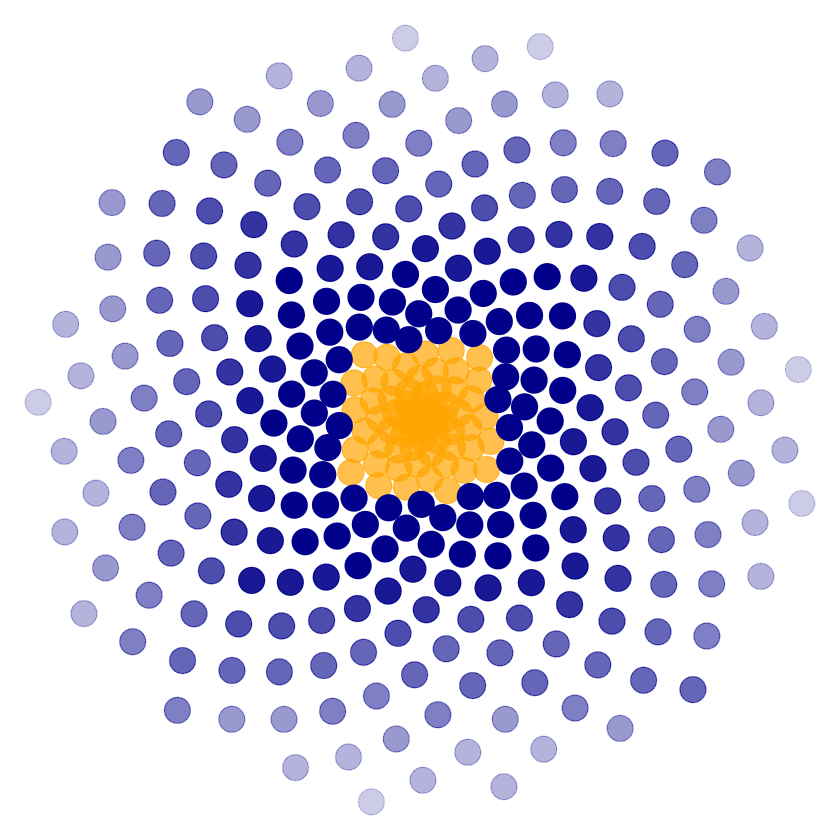

In [29]:
# Load the ggplot2 package
library(ggplot2)
library(dplyr)

# Generate the dataset for the flower drawing
points <- 330
angle <- pi * (3 - sqrt(5))

t <- (1:points) * angle
x <- sin(t)
y <- cos(t)
df <- data.frame(t, x, y)

# what is plotted is not x and y, but x*t and y*t. I'll assign this to new variables x_new and y_new, to make the subsequent categorization less cumbersome. 
df$x_new <- x * t
df$y_new <- y * t

## add color and transparency variables to change the look of the flower
# color
df$flower_color <- "darkblue"
df$flower_color[between(df$x_new, -150, 150) & between(df$y_new, -150, 150)] <- "orange"

# transparency
df$transp_value <- 0.2
df$transp_value[between(df$x_new, -750, 750) & between(df$y_new, -750, 750)] <- 0.3
df$transp_value[between(df$x_new, -650, 650) & between(df$y_new, -650, 650)] <- 0.4
df$transp_value[between(df$x_new, -600, 600) & between(df$y_new, -600, 600)] <- 0.5
df$transp_value[between(df$x_new, -550, 550) & between(df$y_new, -550, 550)] <- 0.6
df$transp_value[between(df$x_new, -450, 450) & between(df$y_new, -450, 450)] <- 0.7
df$transp_value[between(df$x_new, -400, 400) & between(df$y_new, -400, 400)] <- 0.8
df$transp_value[between(df$x_new, -350, 350) & between(df$y_new, -350, 350)] <- 0.9
df$transp_value[between(df$x_new, -300, 300) & between(df$y_new, -300, 300)] <- 1.0
df$transp_value[between(df$x_new, -150, 150) & between(df$y_new, -150, 150)] <- 0.7

# draw the flower
flower <- ggplot(df, aes(x = x_new, y = y_new)) +
      	  geom_point(size = 7, shape = 21, colour = df$flower_color, fill = df$flower_color, alpha = df$transp_value) +
		  theme_void()
flower

# Sources

* https://ggplot2.tidyverse.org/reference/geom_point.html
* https://ggplot2.tidyverse.org/articles/ggplot2-specs.html

---

# Development steps

**Initial thoughts:**
* Re-use the code, take a look at the dataset
* play around with number of dots and angles
* Remove axes and labels with theme_void()
* Play around with different point shapes
* Add color and transparency

---

## R packages 

These are the packages that were used during development:

In [30]:
library(ggplot2)
library(dplyr)

## Step 0: Look at the datapoints

In [43]:
points <- 500
	
# Define the Golden Angle
angle <- pi * (3 - sqrt(5))
	
t <- (1:points) * angle
x <- sin(t)
y <- cos(t)
df <- data.frame(t, x, y)

df

t         x           y          
1    2.399963  0.67549029 -0.73736888
2    4.799926 -0.99617104  0.08742572
3    7.199890  0.79360075  0.60843886
4    9.599853 -0.17418195 -0.98471349
5   11.999816 -0.53672805  0.84375529
6   14.399779  0.96571507 -0.25960430
7   16.799743 -0.88744843 -0.46090702
8   19.199706  0.34303863  0.93932130
9   21.599669  0.38155641 -0.92434556
10  23.999632 -0.90573427  0.42384600
11  26.399596  0.95416412  0.29928386
12  28.799559 -0.50140758 -0.86521121
13  31.199522 -0.21471943  0.97667577
14  33.599485  0.81806243 -0.57512943
15  35.999448 -0.99170812 -0.12851069
16  38.399412  0.64444698  0.76464900
17  40.799375  0.04131783 -0.99914605
18  43.199338 -0.70537994  0.70882941
19  45.599301  0.99893261 -0.04619145
20  47.999265 -0.76778369 -0.64070914
21  50.399228  0.13334699  0.99106941
22  52.799191  0.57113185 -0.82085834
23  55.199154 -0.97561669  0.21948137
24  57.599118  0.86764692  0.49718087
25  59.999081 -0.30393498 -0.95269278
26  62.399044 -0.41942253  0.90779113
27  64.799007  0.92247322 -0.38606108
28  67.198970 -0.94098356 -0.33845228
29  69.598934  0.46523076  0.88518944
30  71.998897  0.25489019 -0.96697001
⋮   ⋮         ⋮           ⋮          
471 1130.383  -0.5569210   0.83056545
472 1132.783   0.9716951  -0.23623837
473 1135.183  -0.8760745  -0.48217581
474 1137.583   0.3202850   0.94732124
475 1139.983   0.4037381  -0.91487459
476 1142.382  -0.9156928   0.40187886
477 1144.782   0.9466687   0.32220866
478 1147.182  -0.4803952  -0.87705214
479 1149.582  -0.2382117   0.97121324
480 1151.982   0.8316950  -0.55523270
481 1154.382  -0.9883203  -0.15239062
482 1156.782   0.6258183   0.77996890
483 1159.182   0.0654025  -0.99785896
484 1161.582  -0.7222698   0.69161139
485 1163.982   0.9997561  -0.02208647
486 1166.382  -0.7521082  -0.65903964
487 1168.782   0.1094063   0.99399711
488 1171.182   0.5907626  -0.80684543
489 1173.582  -0.9806262   0.19588830
490 1175.982   0.8554039   0.51796155
491 1178.382  -0.2808702  -0.95974576
492 1180.782  -0.4411940   0.89741176
493 1183.182   0.9315157  -0.36370124
494 1185.582  -0.9325473  -0.36104781
495 1187.982   0.4437471   0.89615207
496 1190.382   0.2781367  -0.96054149
497 1192.782  -0.8539258   0.52039473
498 1195.182   0.9811799   0.19309573
499 1197.582  -0.5930572  -0.80516030
500 1199.982  -0.1065760   0.99430456

---

## Step 1: Test number of points to be used in the plot, make initial adaptations

* keep angle as in example
* put code into a function
* remove axis with theme_void()
* vary number of points: 300, 500, 750, 1000, 1500

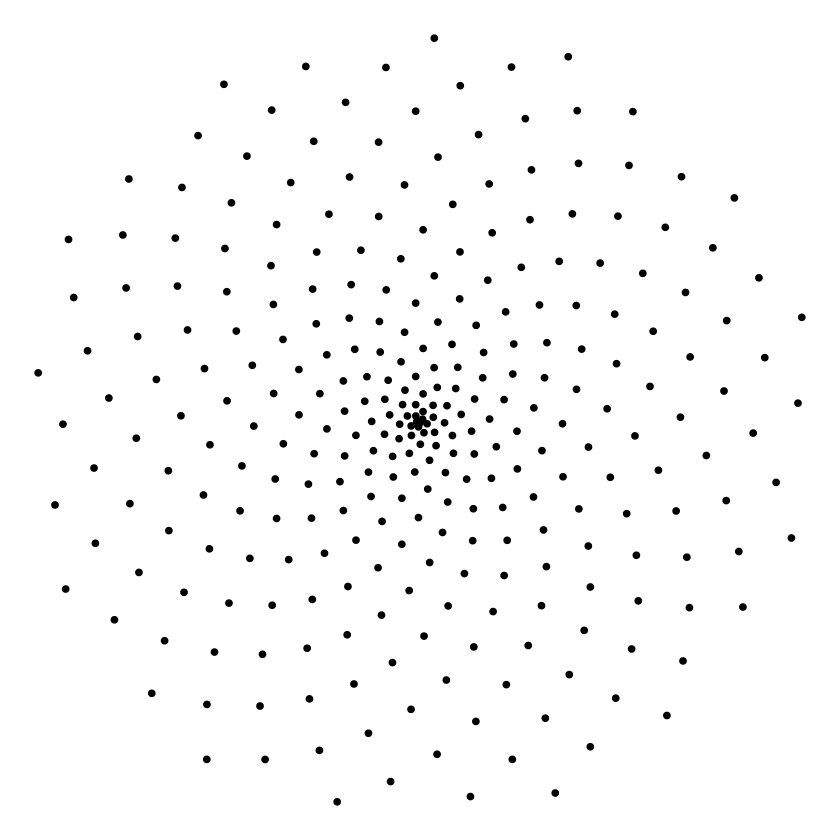

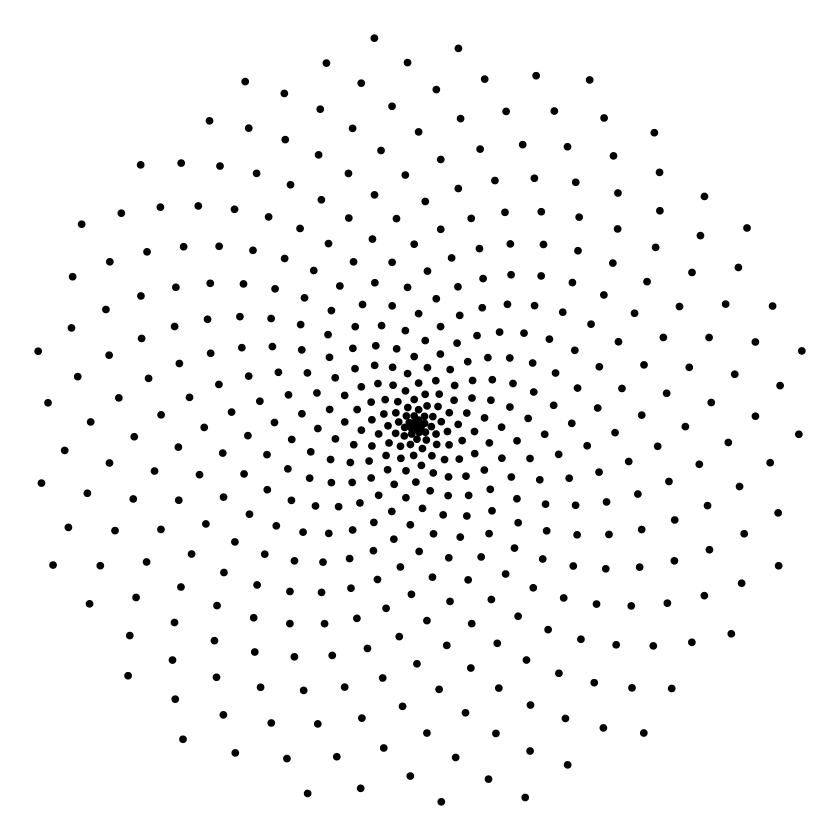

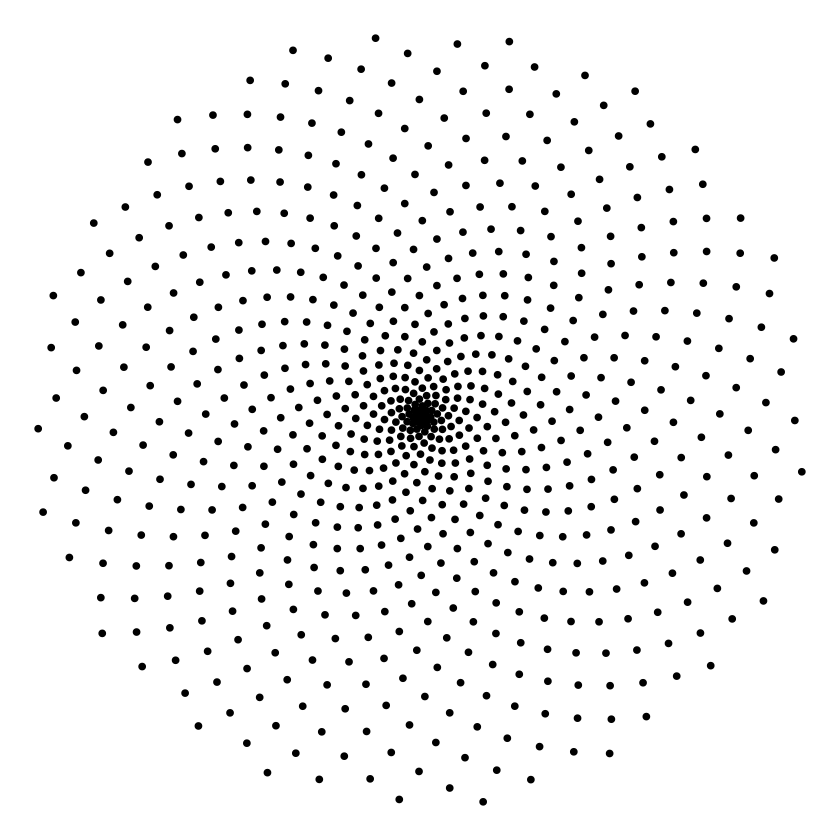

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


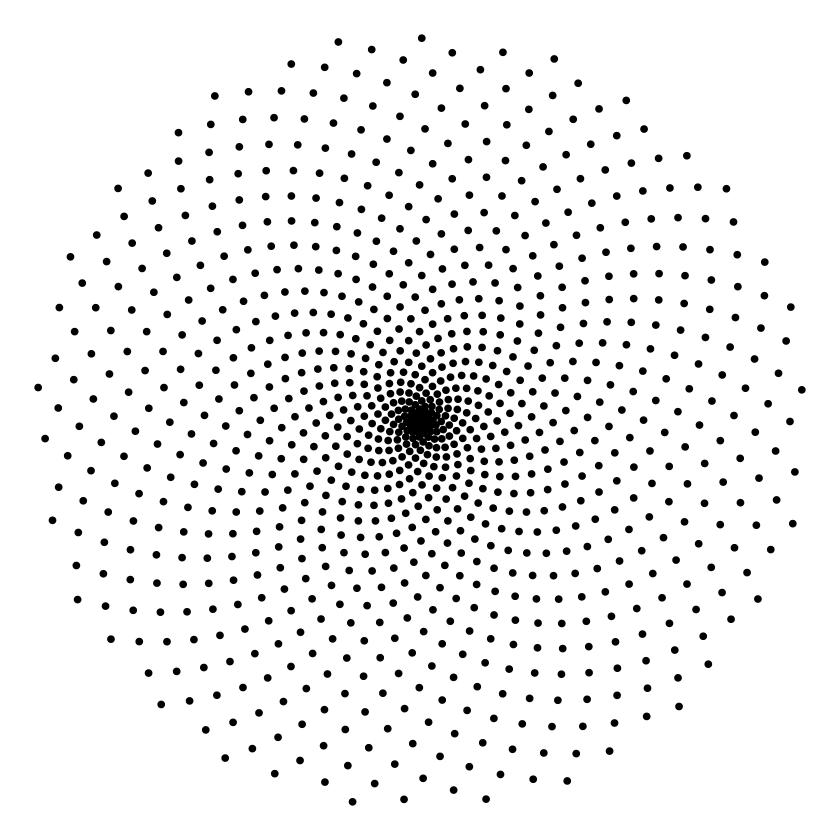

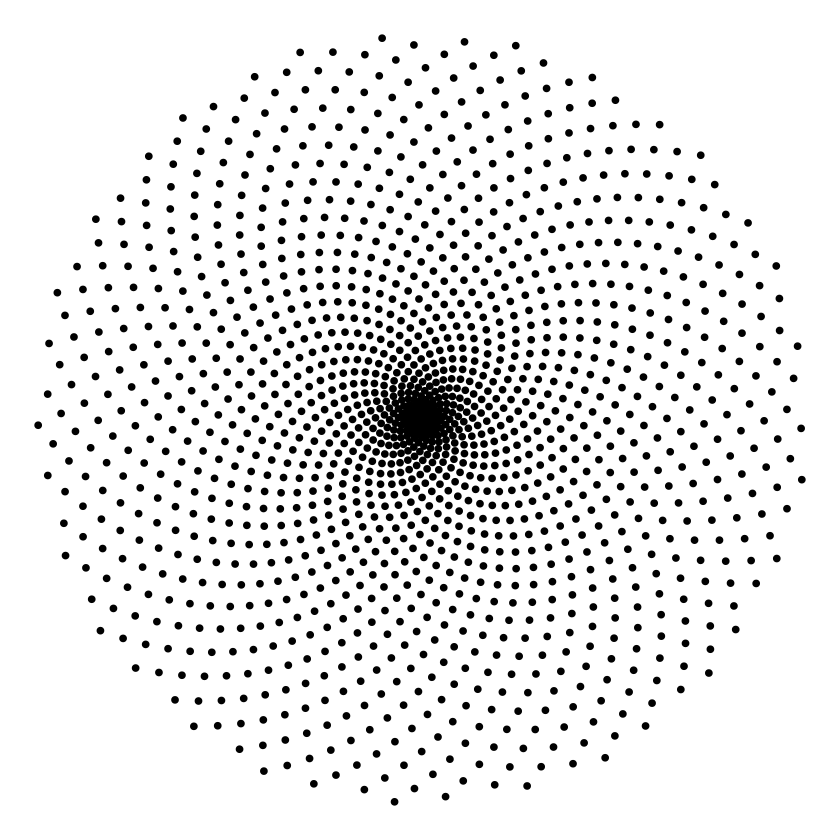

In [2]:
# Load the ggplot2 package
library(ggplot2)

# load the function to draw the flower plots
flower_graph <- function(point_value) {
  flowers <- list()
  for (points in point_value) {
    # Define the Golden Angle
    angle <- pi * (3 - sqrt(5))

    t <- (1:points) * angle
    x <- sin(t)
    y <- cos(t)
    df <- data.frame(t, x, y)

    # View(df)

    flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      geom_point() +
      theme_void()

    flowers[[length(flowers) + 1]] <- flower
  }
  
  return(flowers)
}

# iterate through different point counts
flower_graph(c(300, 500, 750, 1000, 1500))

The plots with 300 or 500 points provide the nicest flower shapes. Omit more points in the following tests.

---

## Step 2: Test different point sizes

* try out different point sizes
* 1, which is used above, is too small - start from 3 and count up to 7
* adapt the plotting functions to accomodate also shape testing in follow-up steps.

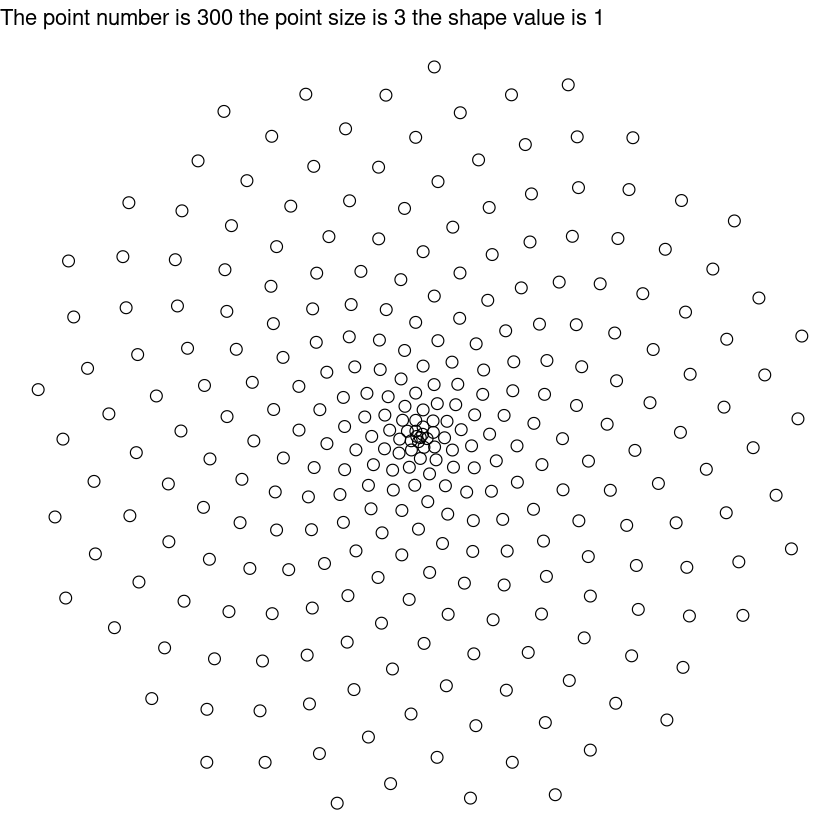

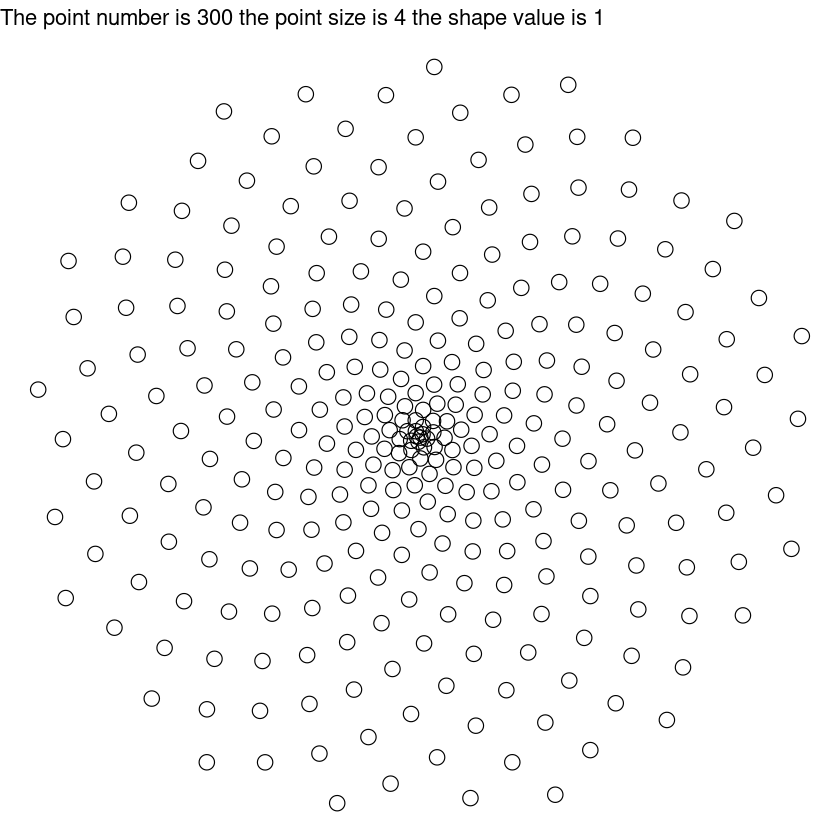

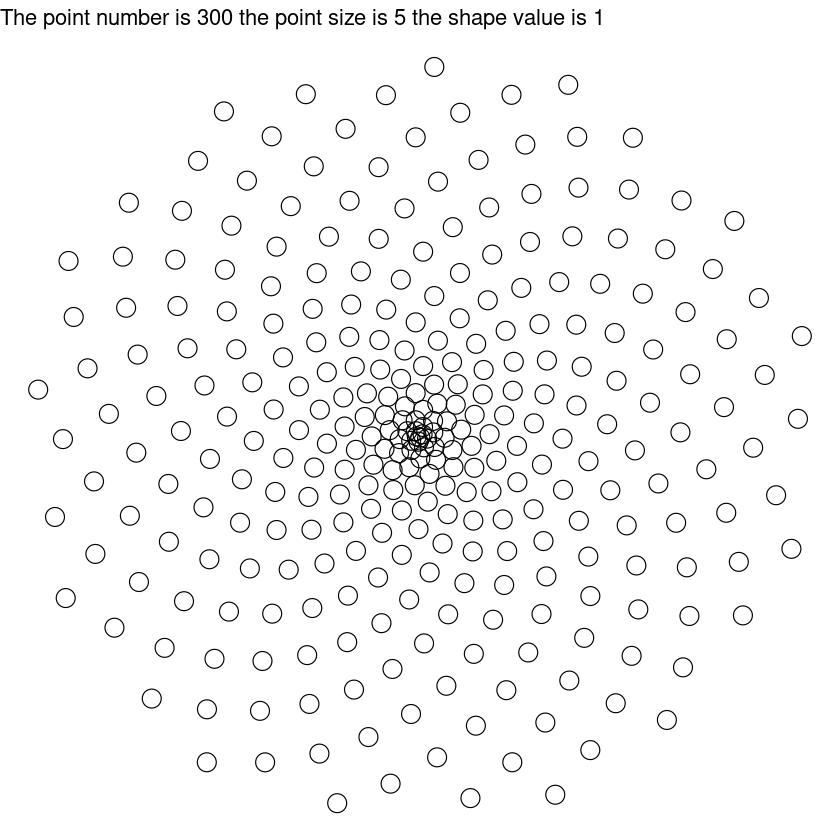

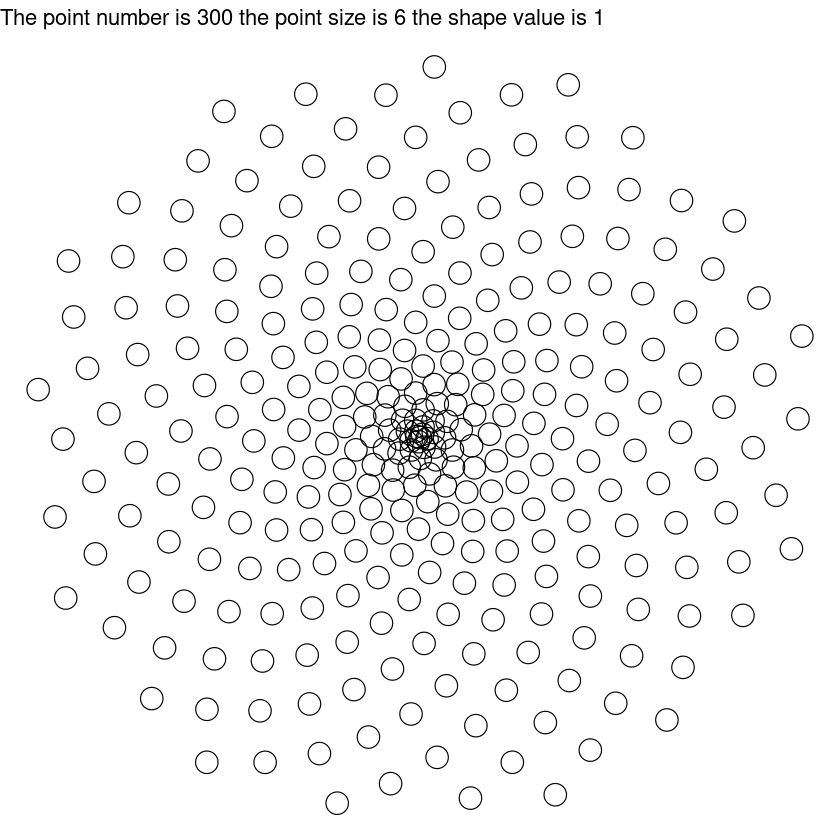

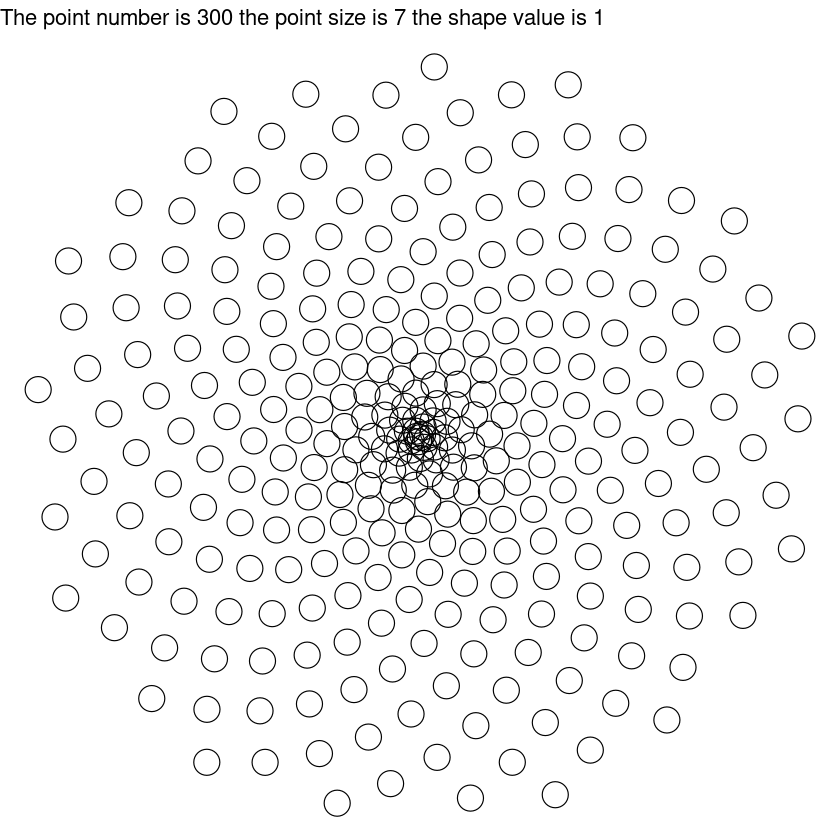

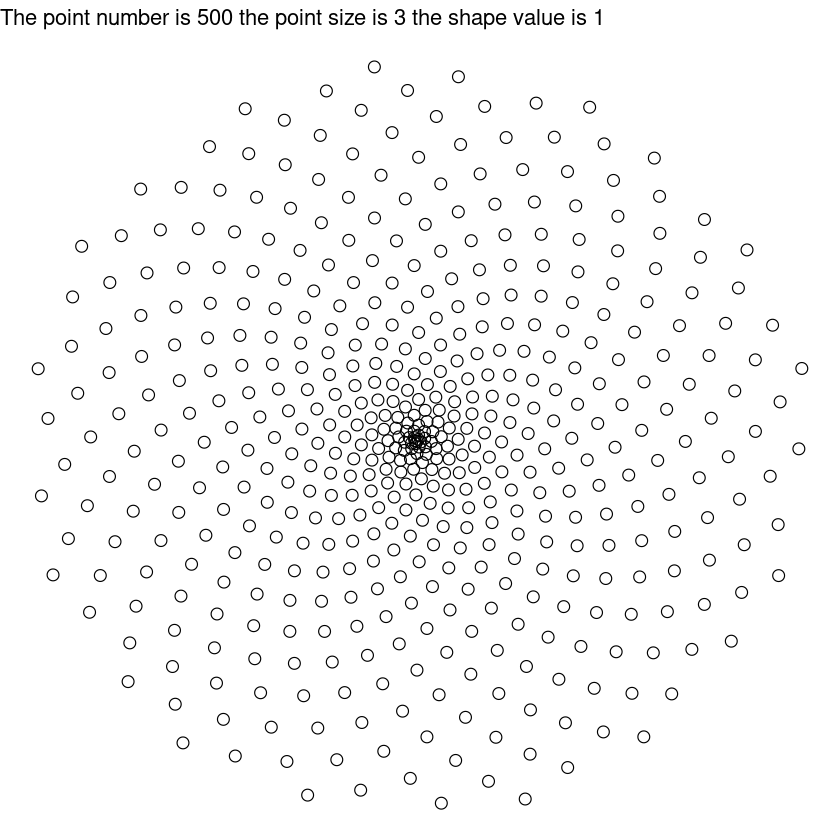

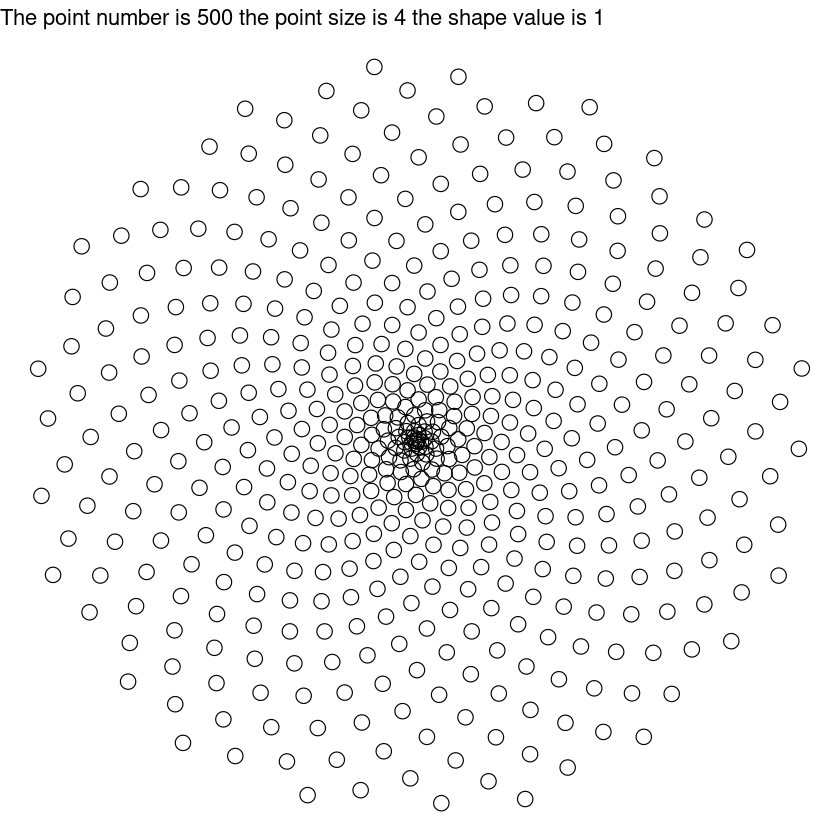

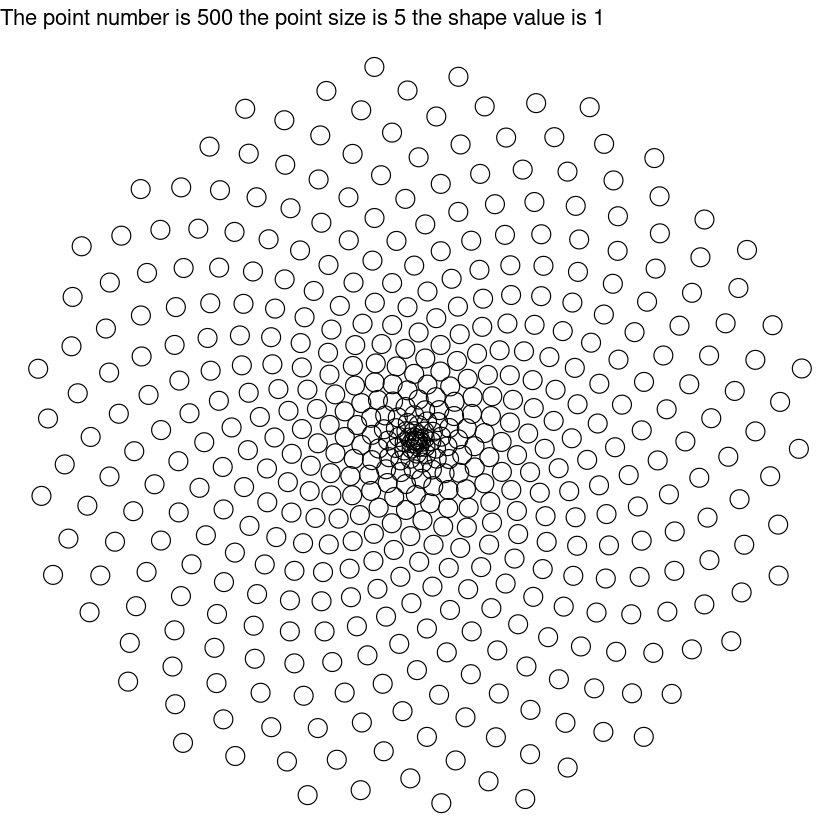

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]


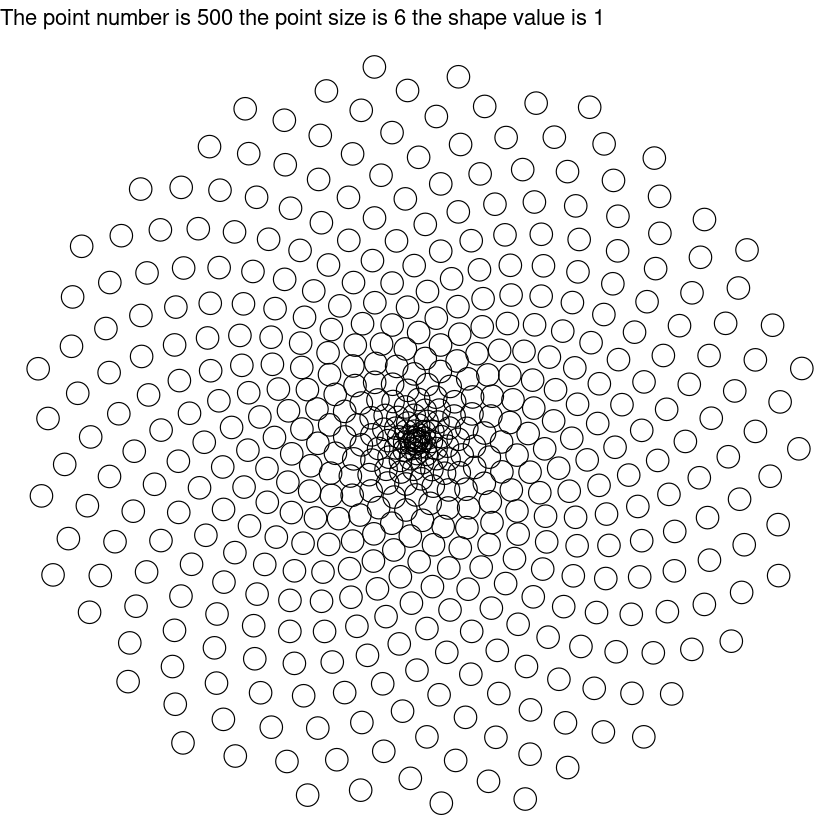

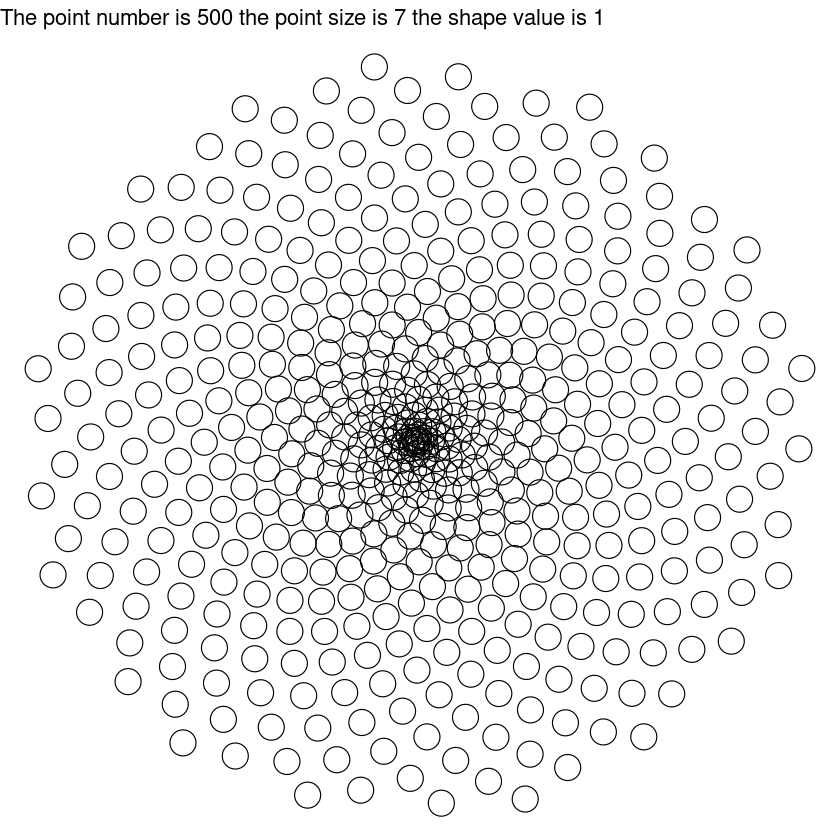

In [3]:
# load the function to draw the flower plots
flower_graph <- function(point_value, size_value, shape_value) {
  flowers <- list()
  for (points in point_value) {
	  for (sizes in size_value) {
		  for (shapes in shape_value) {
			      # Define the Golden Angle
    				angle <- pi * (3 - sqrt(5))

    				t <- (1:points) * angle
    				x <- sin(t)
    				y <- cos(t)
    				df <- data.frame(t, x, y)

    				flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      				geom_point(size = sizes, shape = shapes) +
			  		labs(title = paste0("The point number is ", points, " the point size is ", sizes, " the shape value is ", shapes)) +
      				theme_void()

    				flowers[[length(flowers) + 1]] <- flower
		  }
	  }
  }
  
  return(flowers)
}

# iterate through different point counts
point_counts <- c(300, 500)
size_counts <- 3:7
shape_counts <- 1

flower_graph(point_counts, size_counts, shape_counts)

Size 5 and 6 provide interesting shapes, in my opinion, and will be considered when going forward. 

---

## Step 3: Test different point shapes

* ggplot2 offers a diverse set of shapes - test more natural shapes like points and diamonds, not crosses
* from the cheatsheet: test shapes 0, 1, 2, 5, 6, 9, 21, 22, 23, 24, 25
* use point size 5 for testing

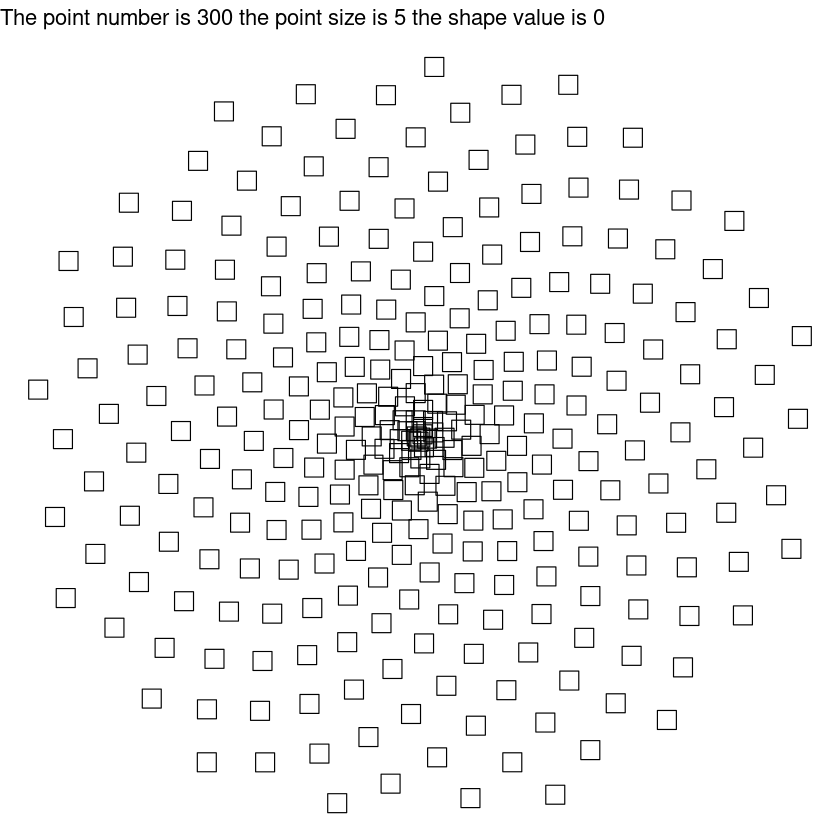

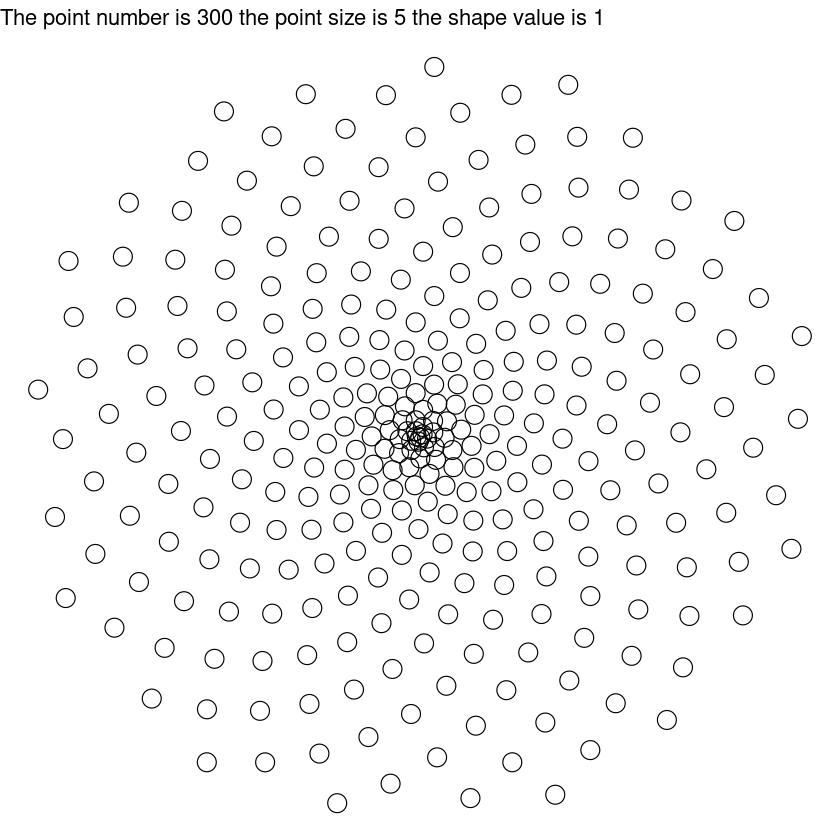

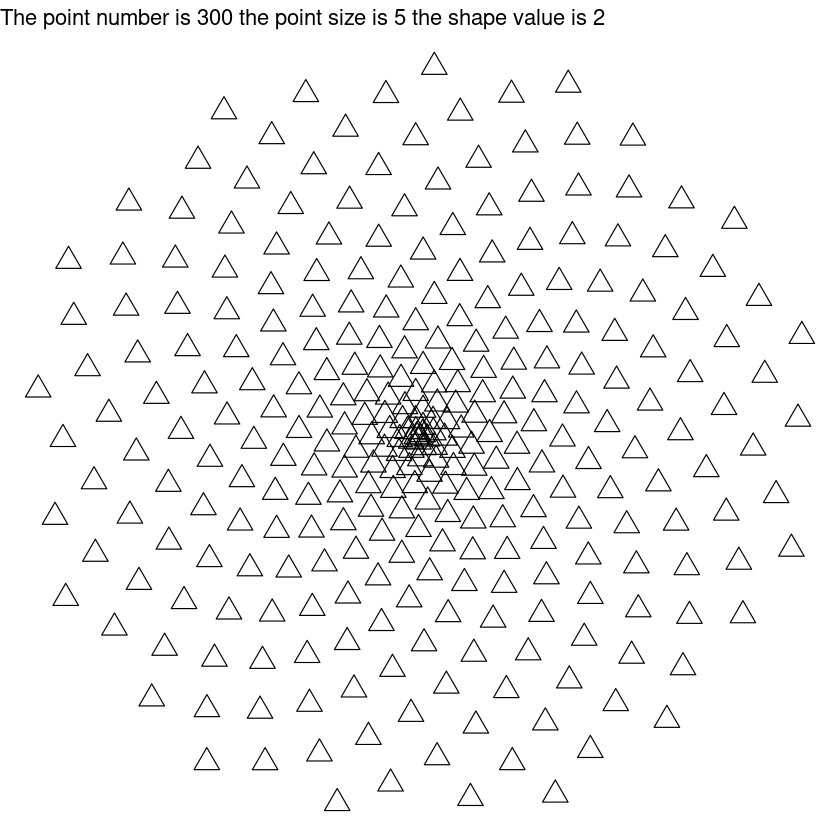

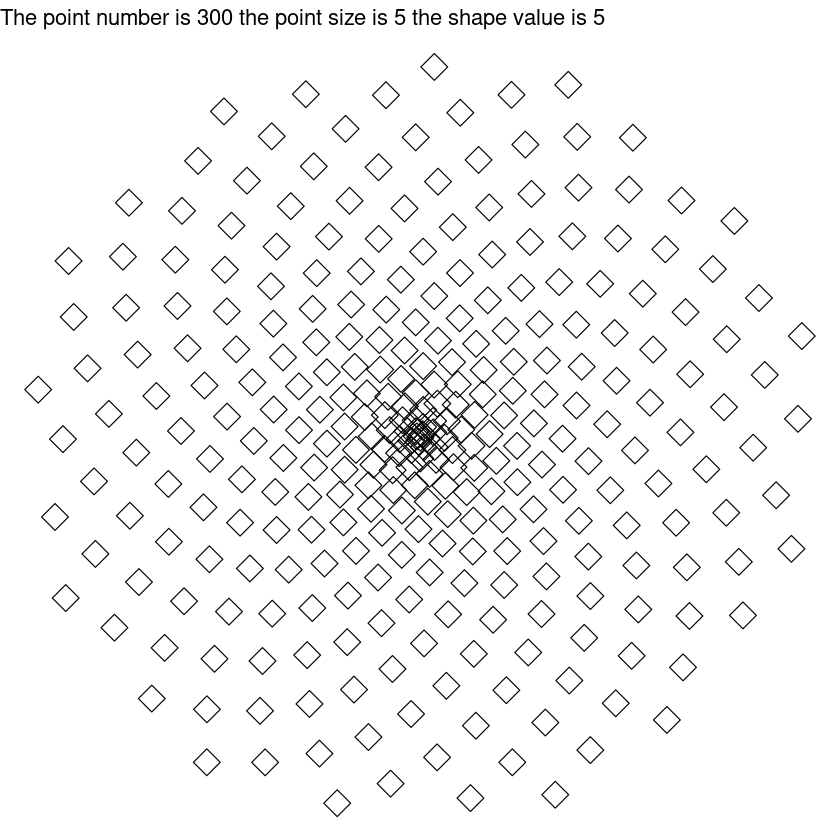

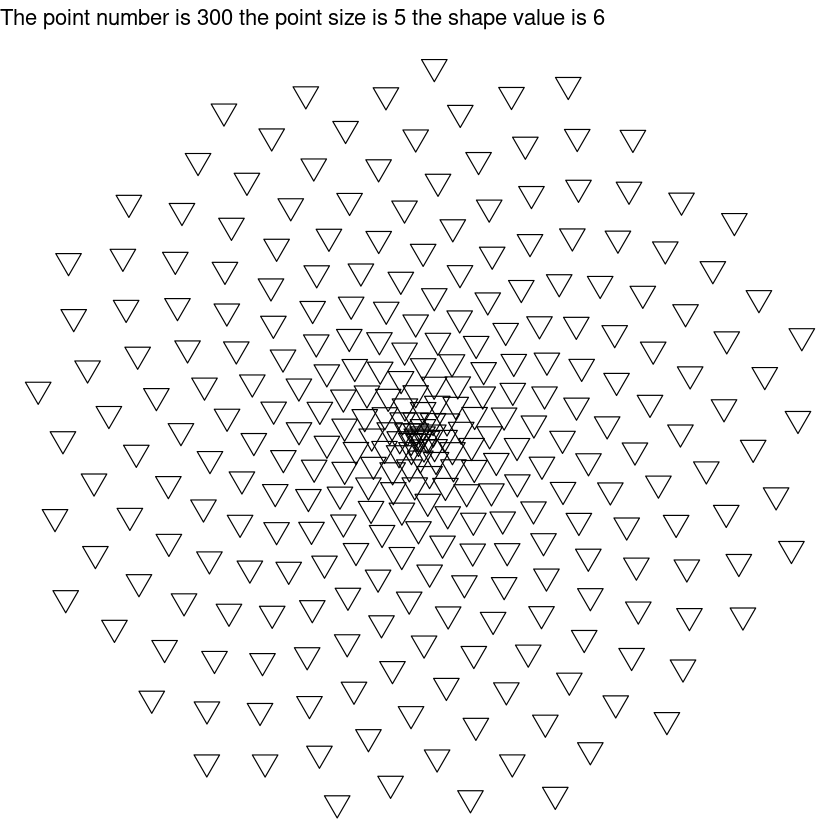

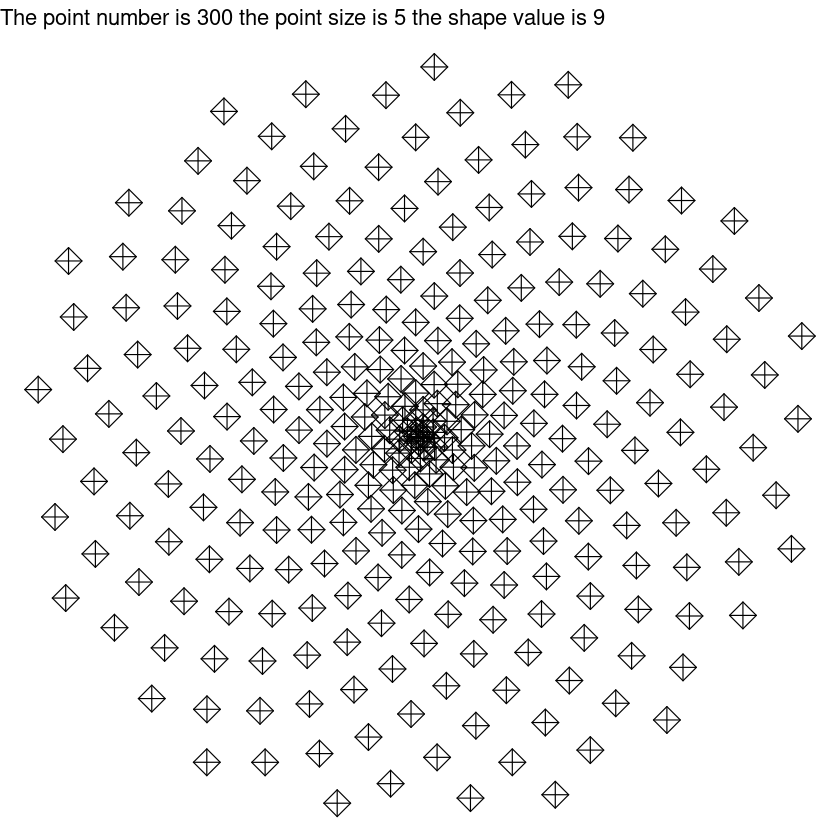

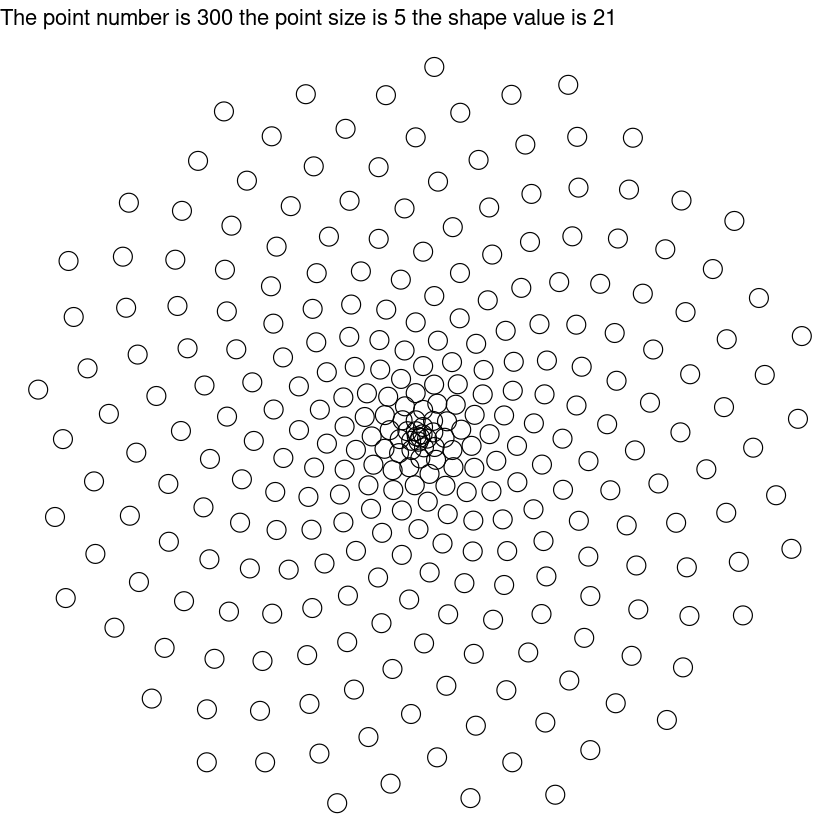

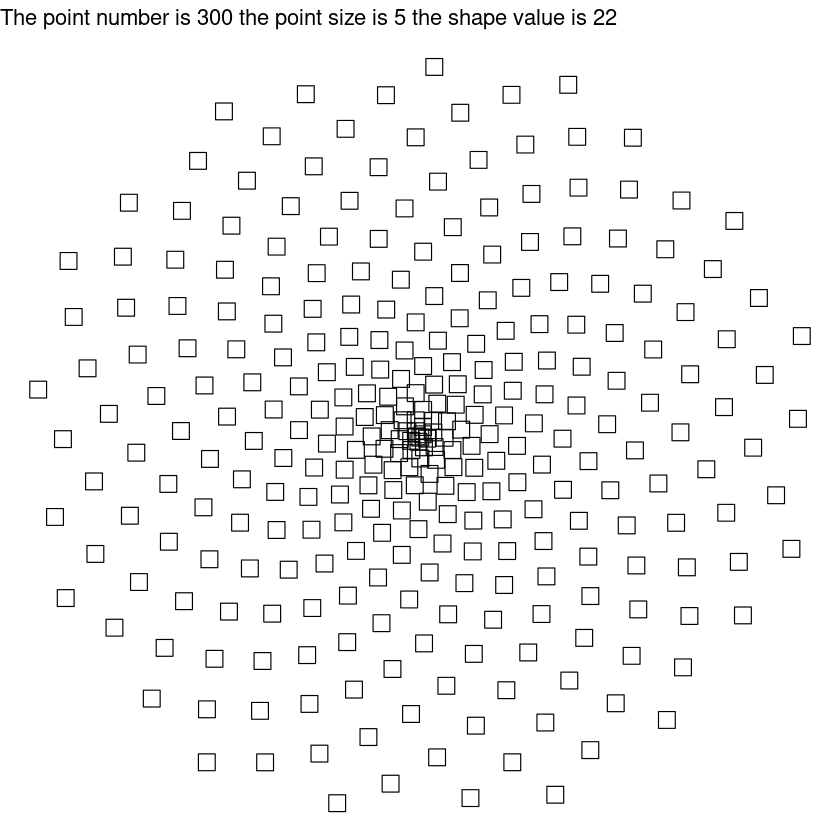

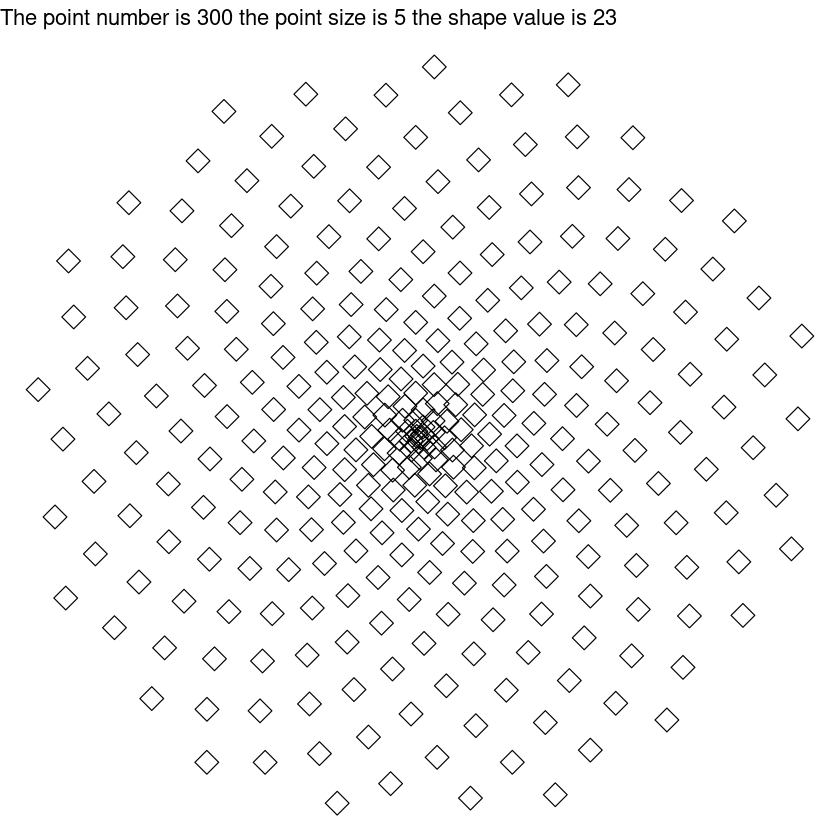

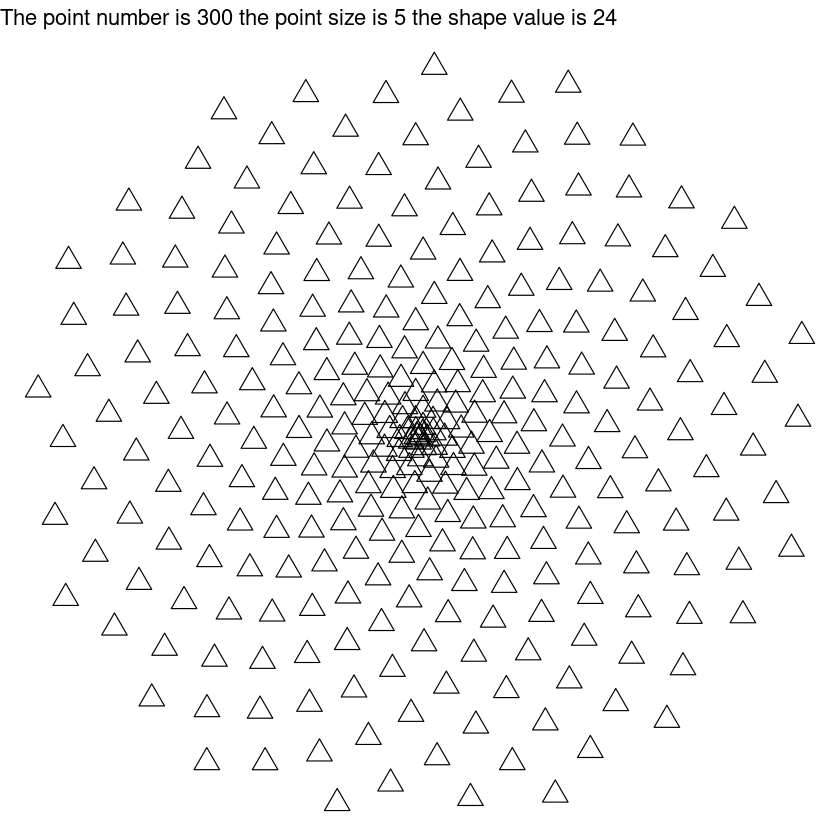

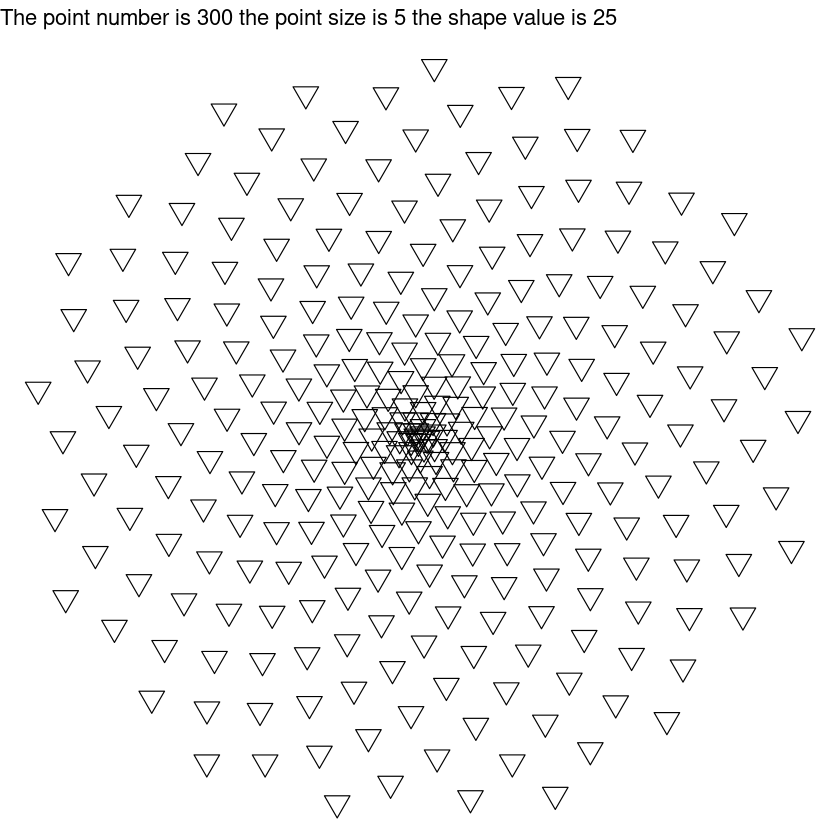

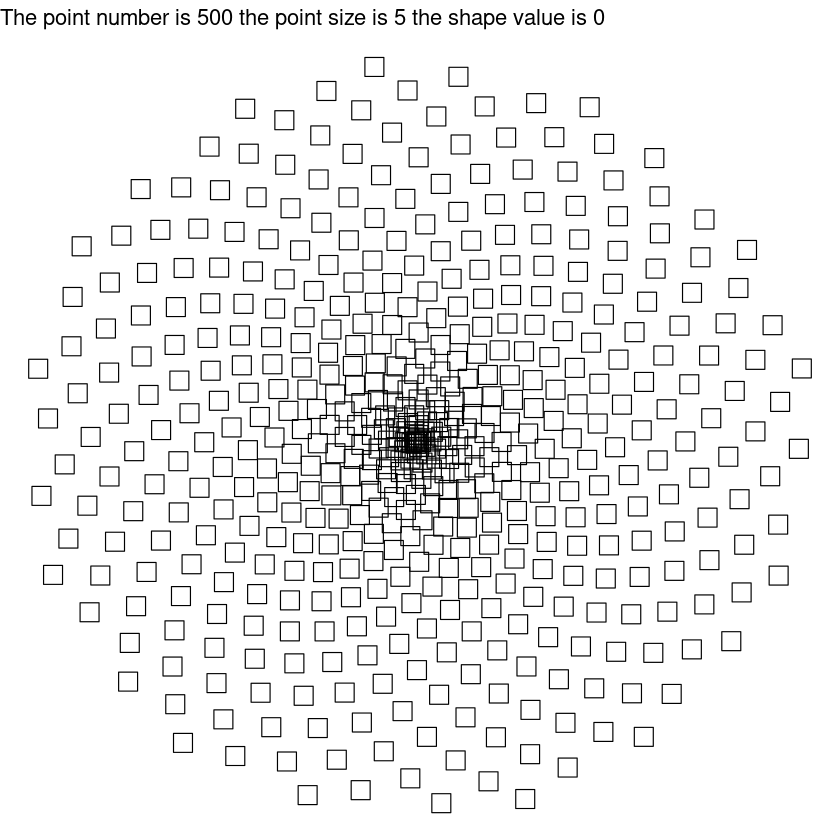

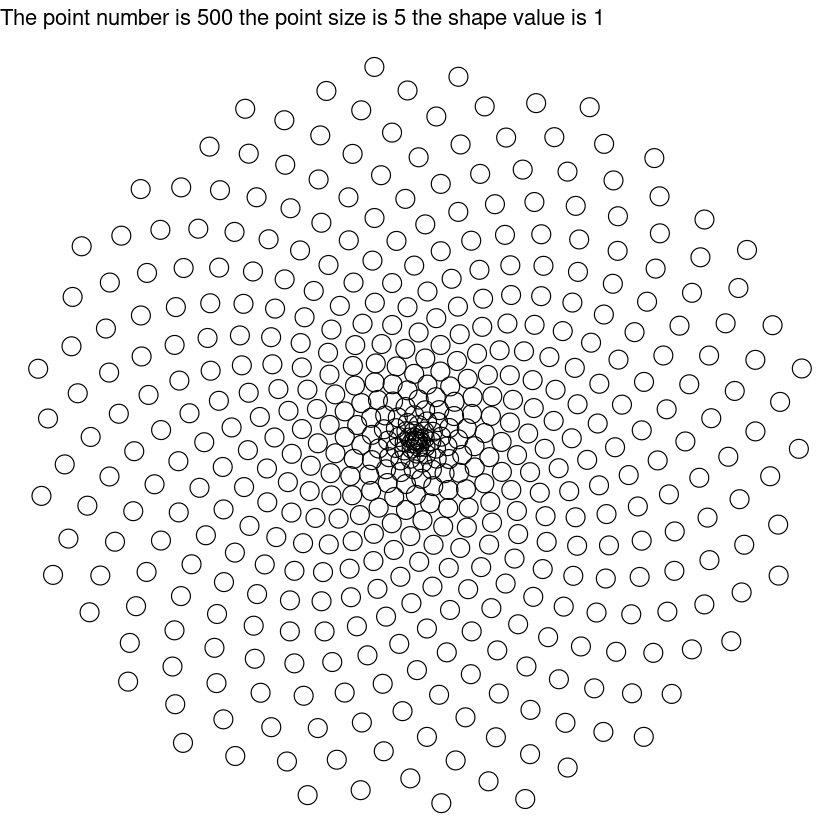

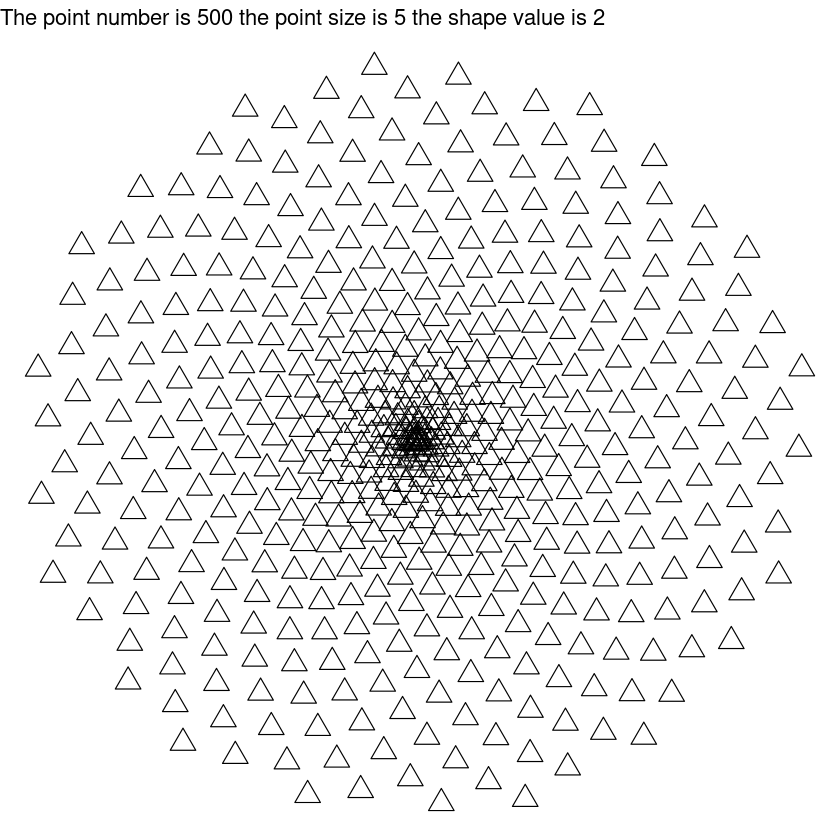

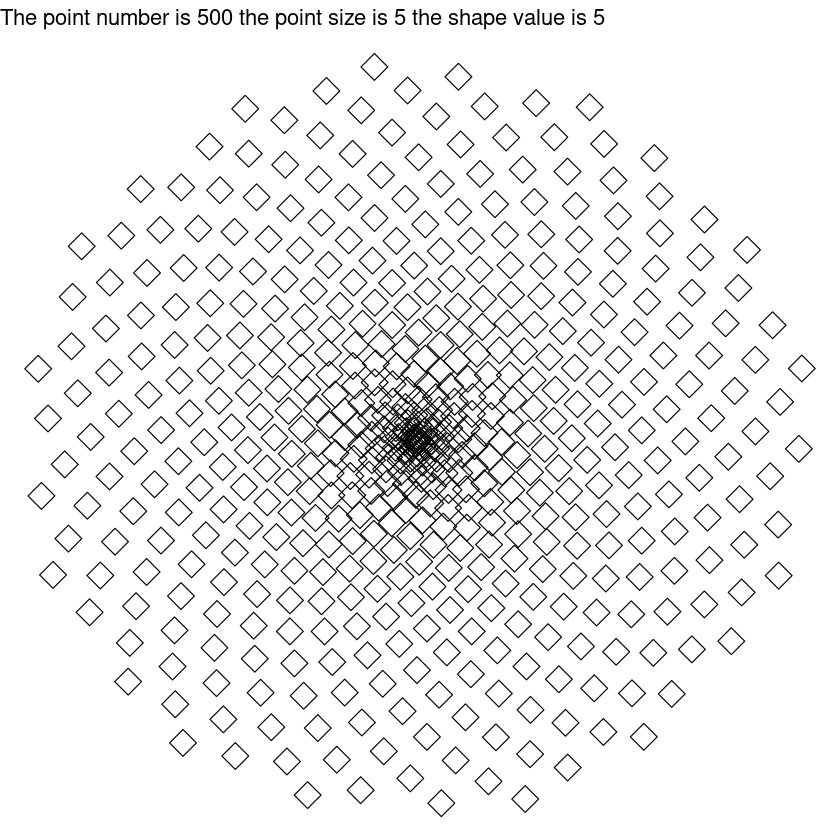

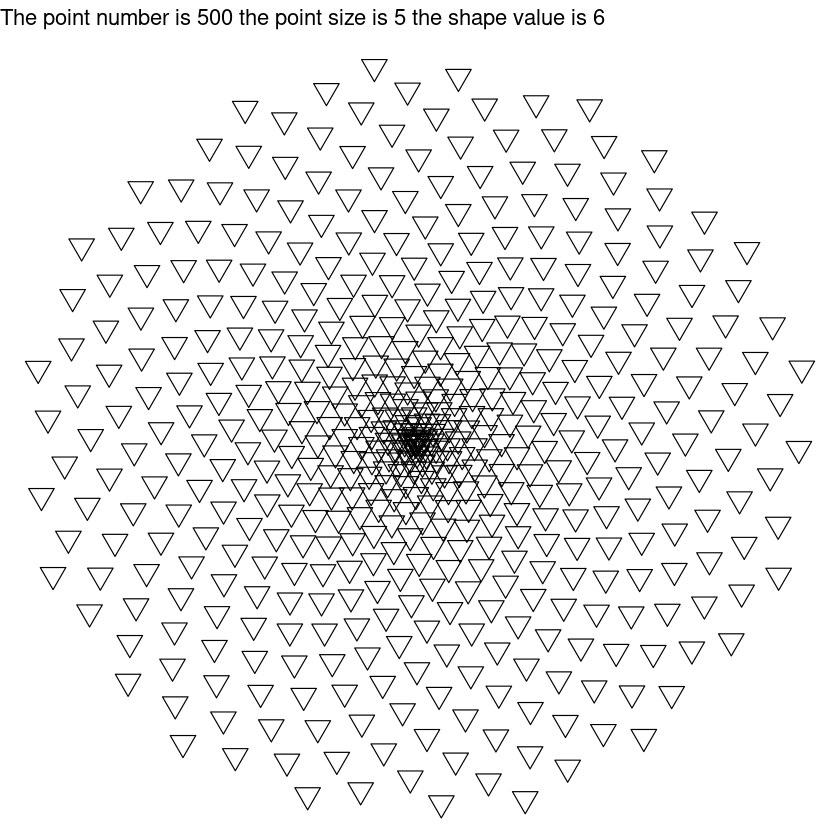

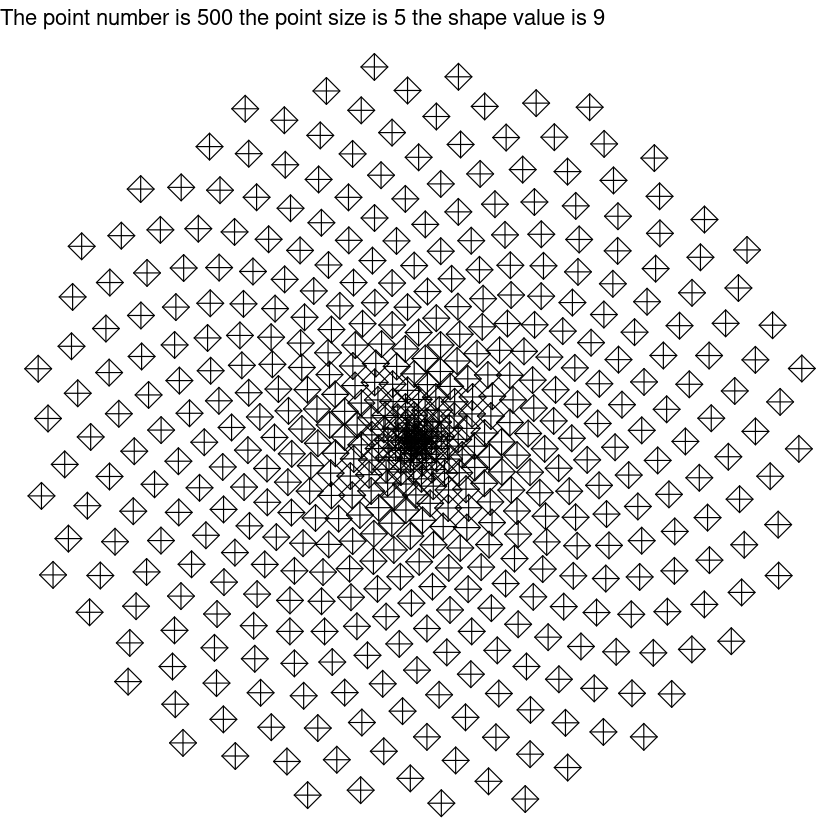

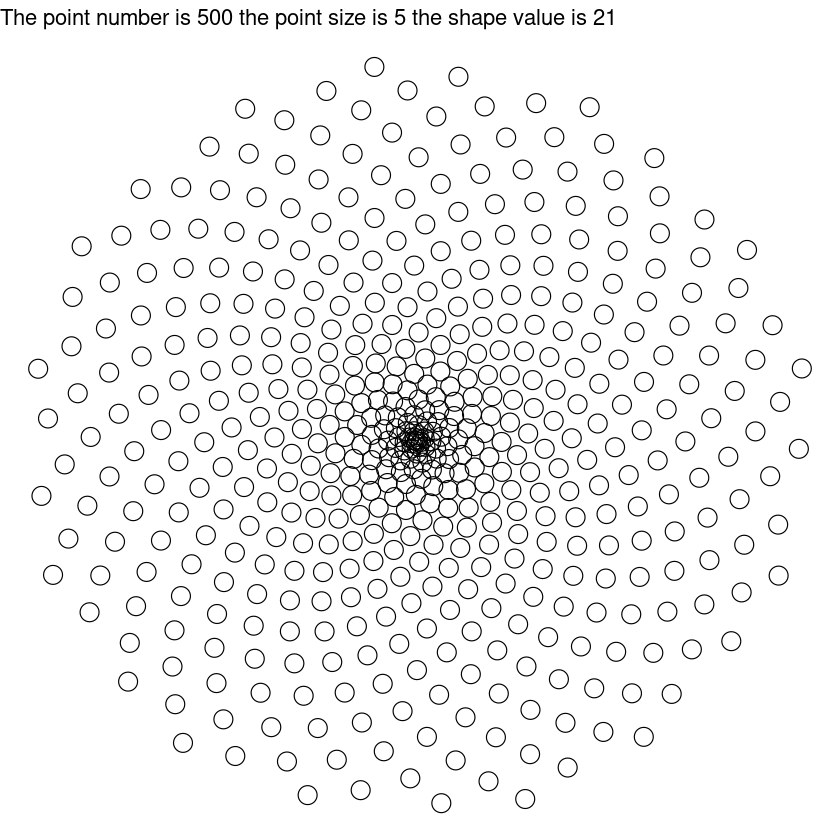

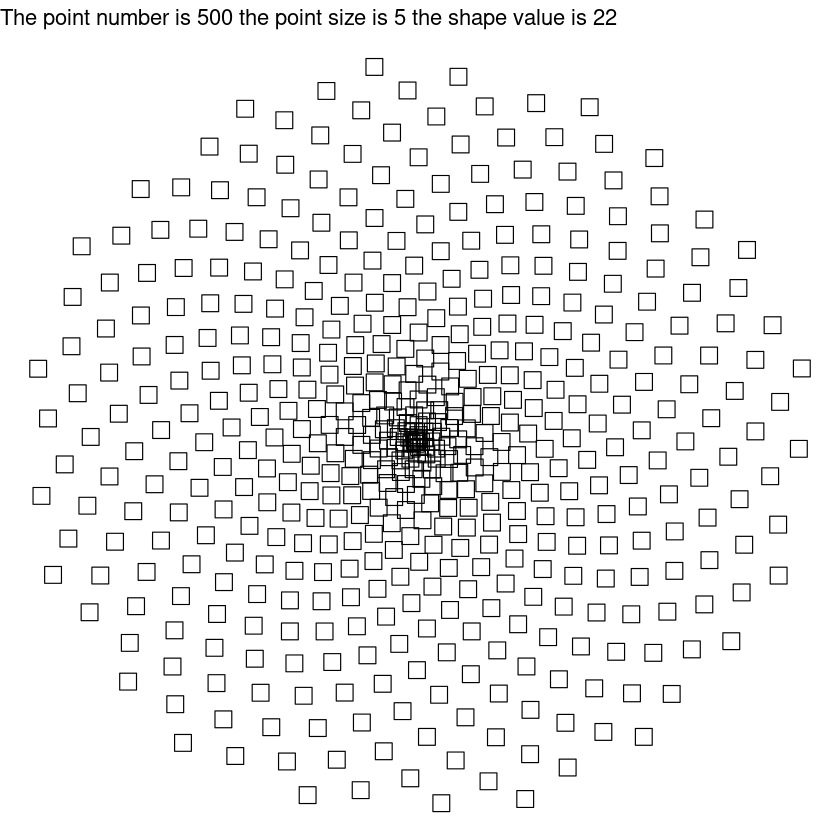

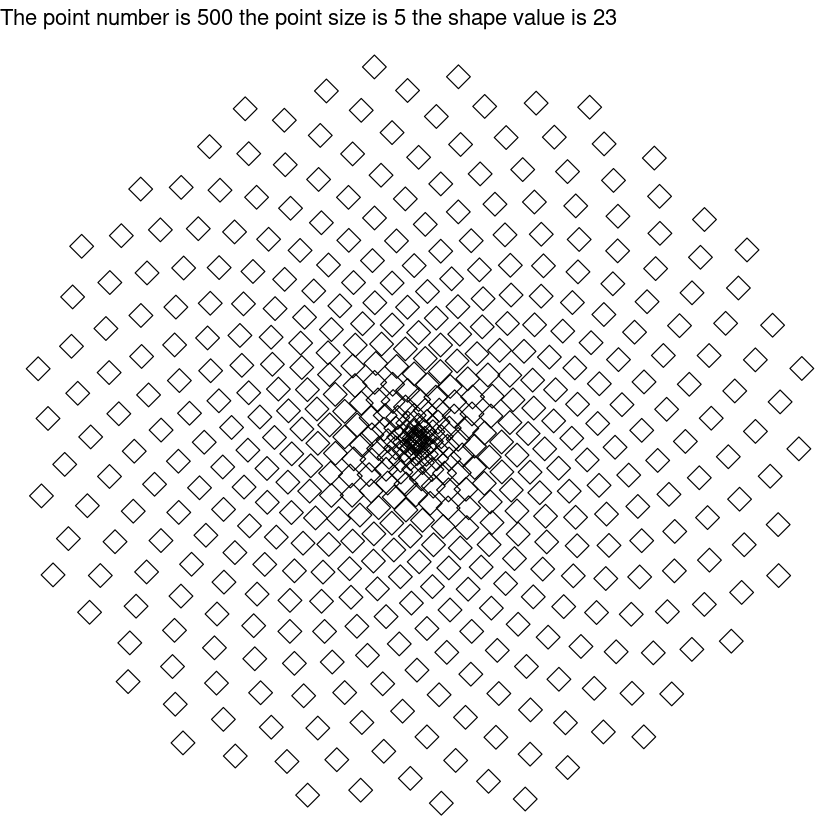

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]


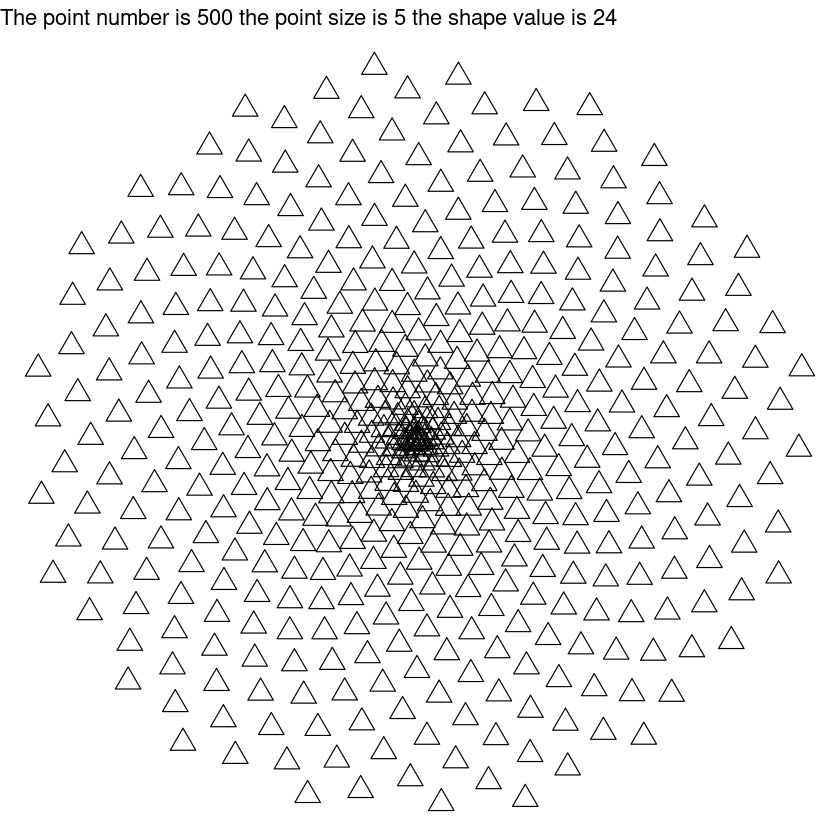

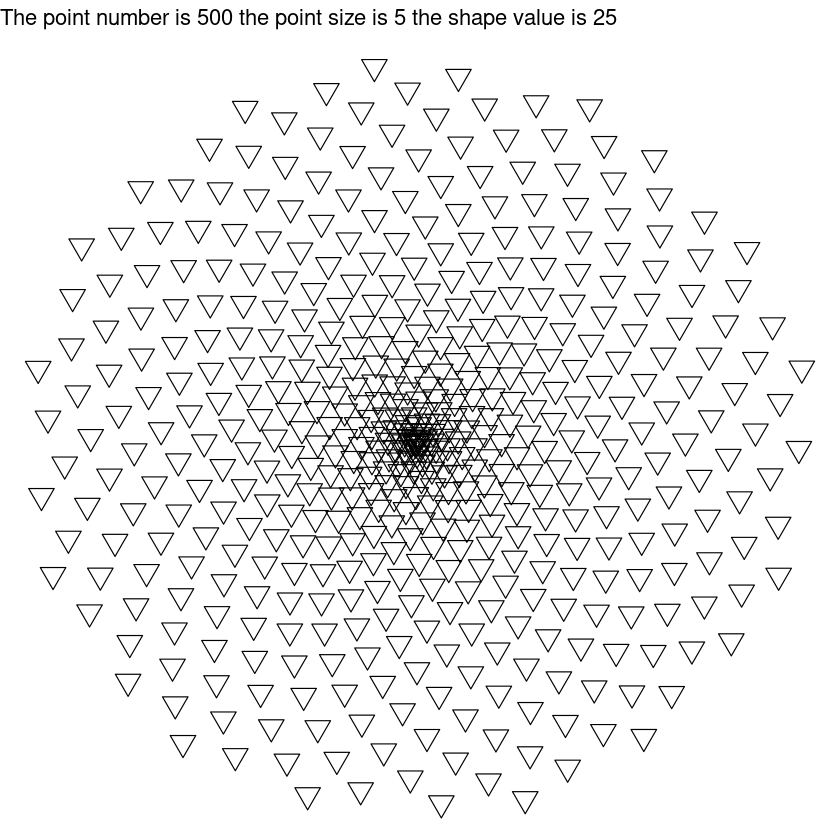

In [6]:
# load the function to draw the flower plots
flower_graph <- function(point_value, size_value, shape_value) {
  flowers <- list()
  for (points in point_value) {
	  for (sizes in size_value) {
		  for (shapes in shape_value) {
			      # Define the Golden Angle
    				angle <- pi * (3 - sqrt(5))

    				t <- (1:points) * angle
    				x <- sin(t)
    				y <- cos(t)
    				df <- data.frame(t, x, y)

    				flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      				geom_point(size = sizes, shape = shapes) +
			  		labs(title = paste0("The point number is ", points, " the point size is ", sizes, " the shape value is ", shapes)) +
      				theme_void()

    				flowers[[length(flowers) + 1]] <- flower
		  }
	  }
  }
  
  return(flowers)
}

# iterate through different point counts
point_counts <- c(300, 500)
size_counts <- 5
shape_counts <- c(0,1,2,5, 6, 9, 21, 22, 23, 24, 25)

flower_graph(point_counts, size_counts, shape_counts)

The graphs with point numbers of 300 look more natural, albeit that could be a bit too few points. 

Regarding the shapes, 21 and 23 are most appealing to me. 

The shape size is a bit too small, though. 

---

## Step 4: Point count, shape and size finetuning

* Test a couple of point numbers: 300, 330, 350, 400
* Keep the point shapes 21 and 23 only
* test a couple of shape sizes: 5.5, 6, 6.5

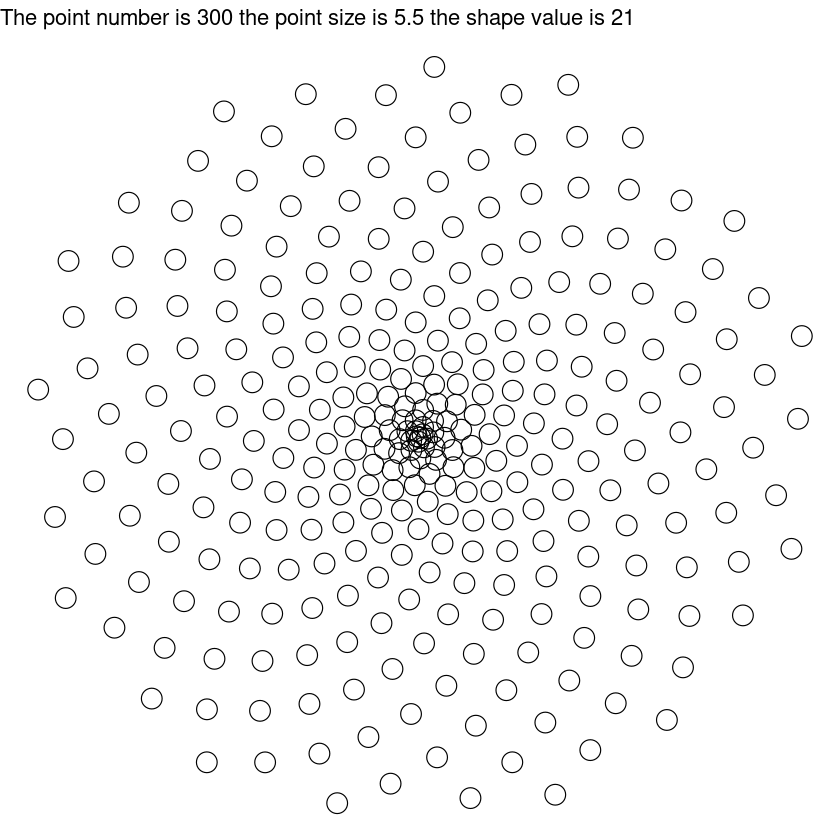

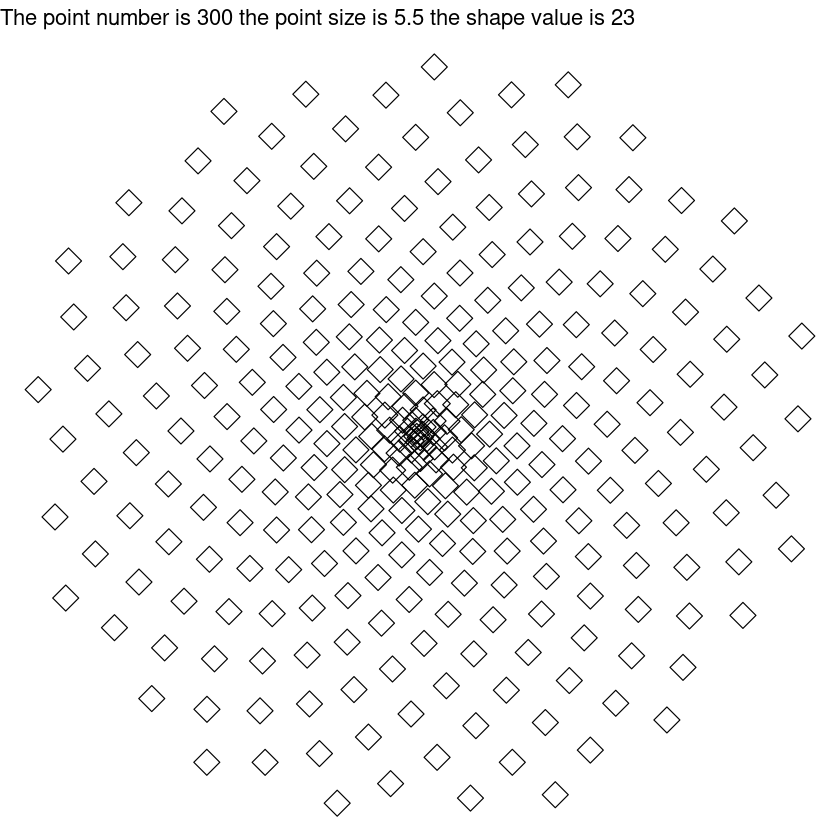

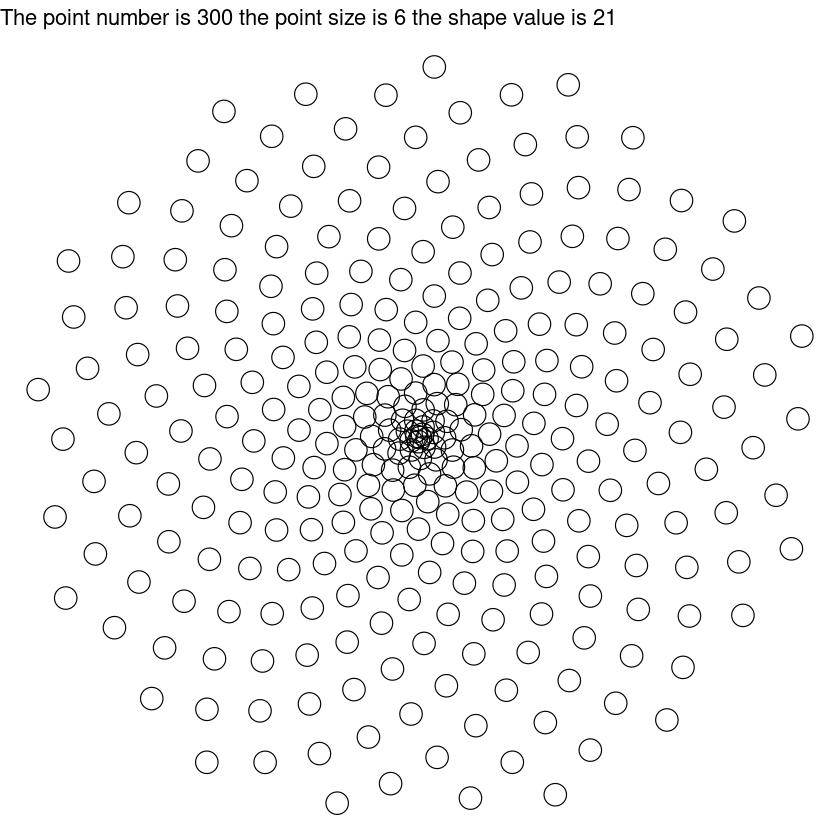

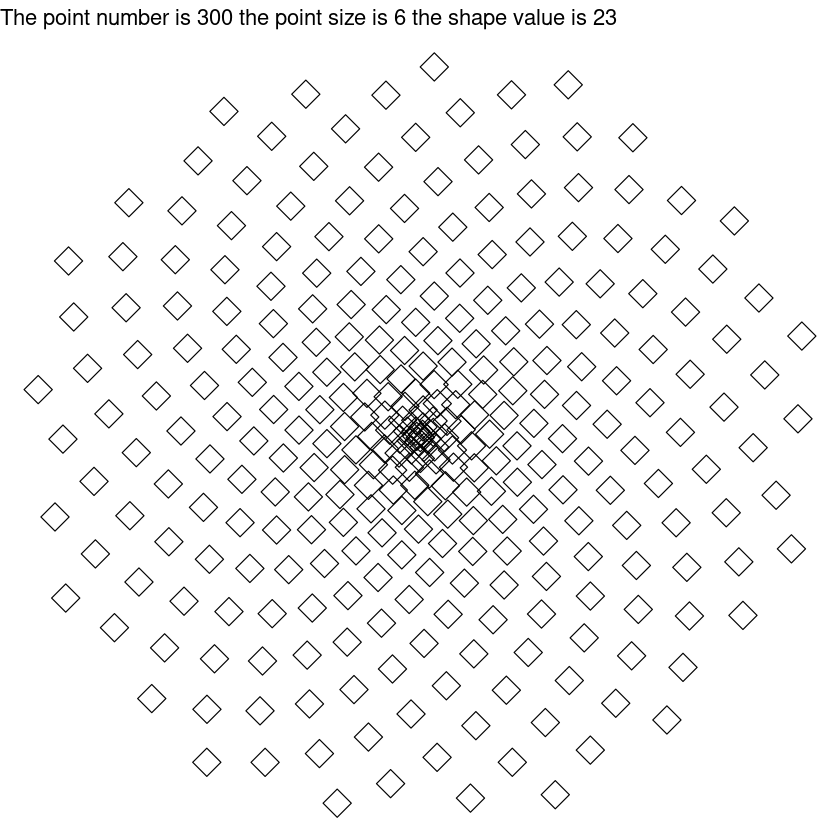

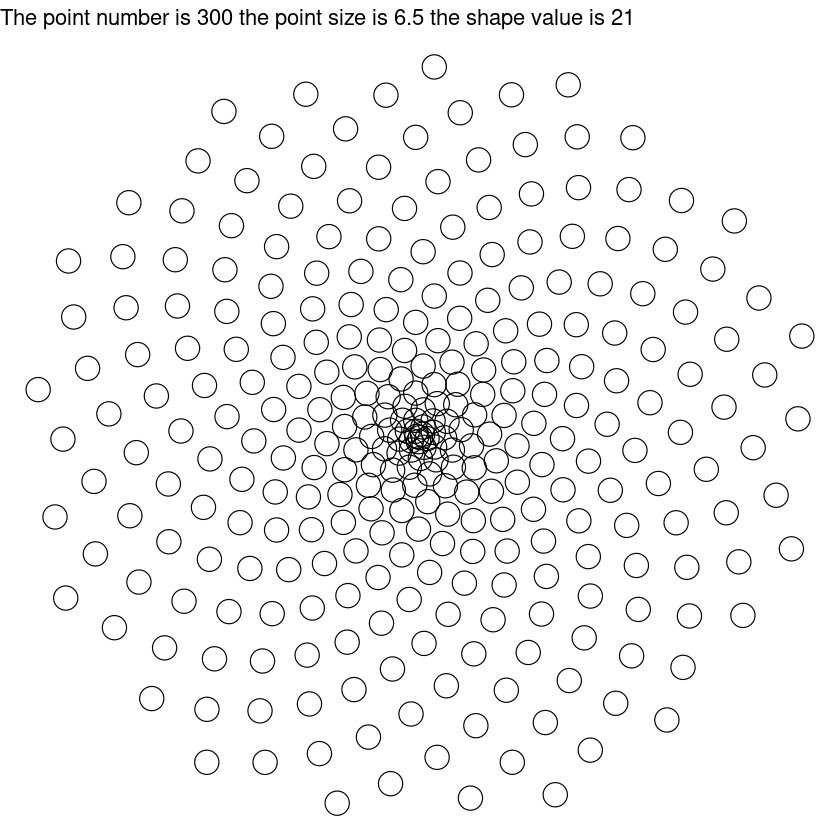

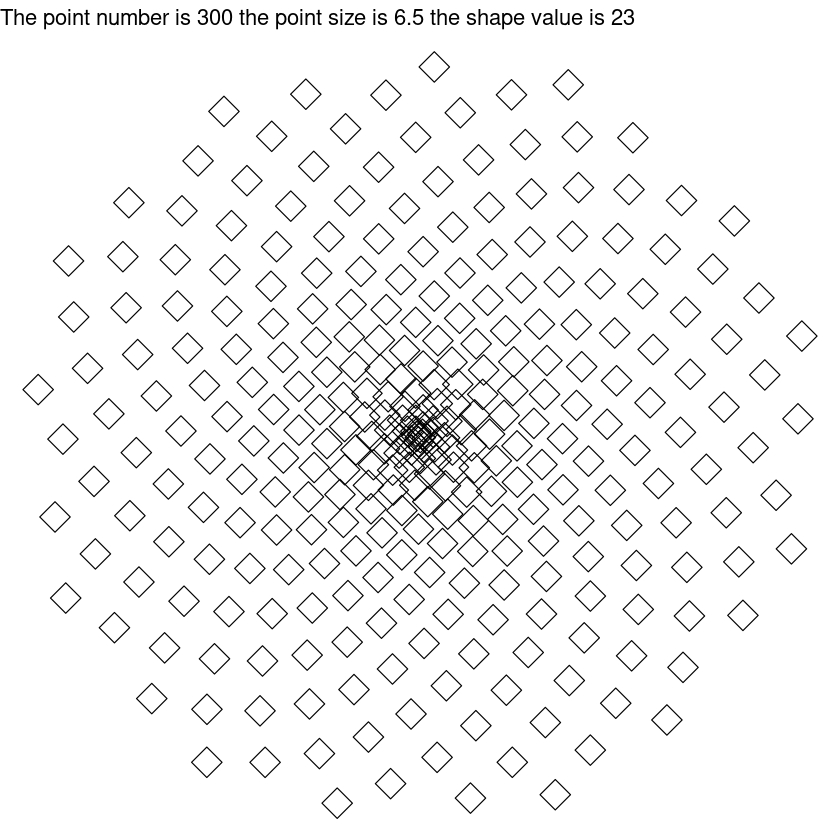

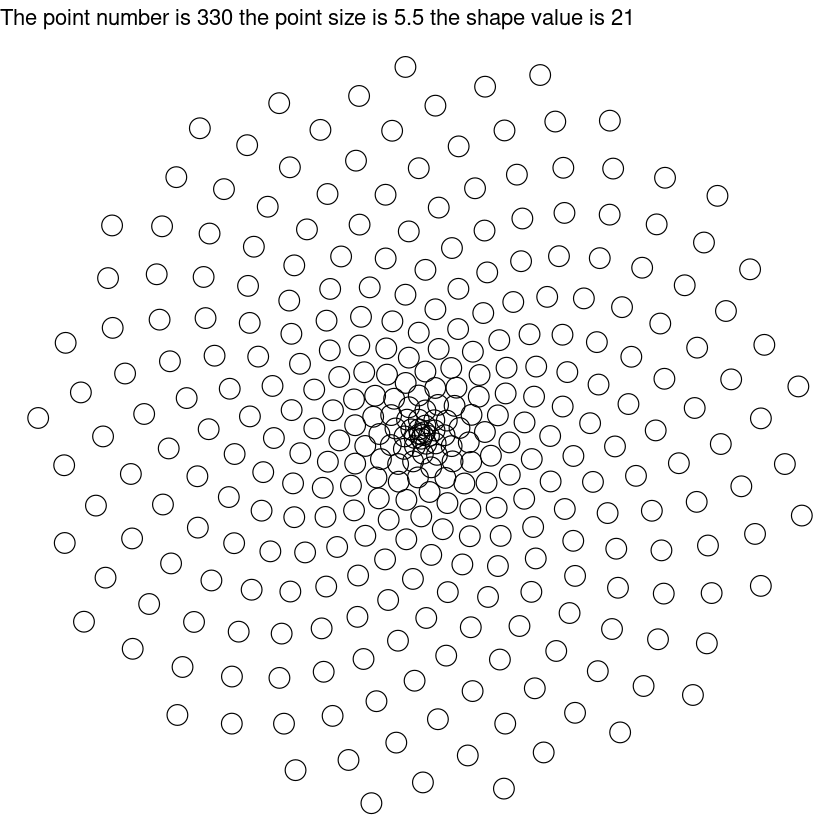

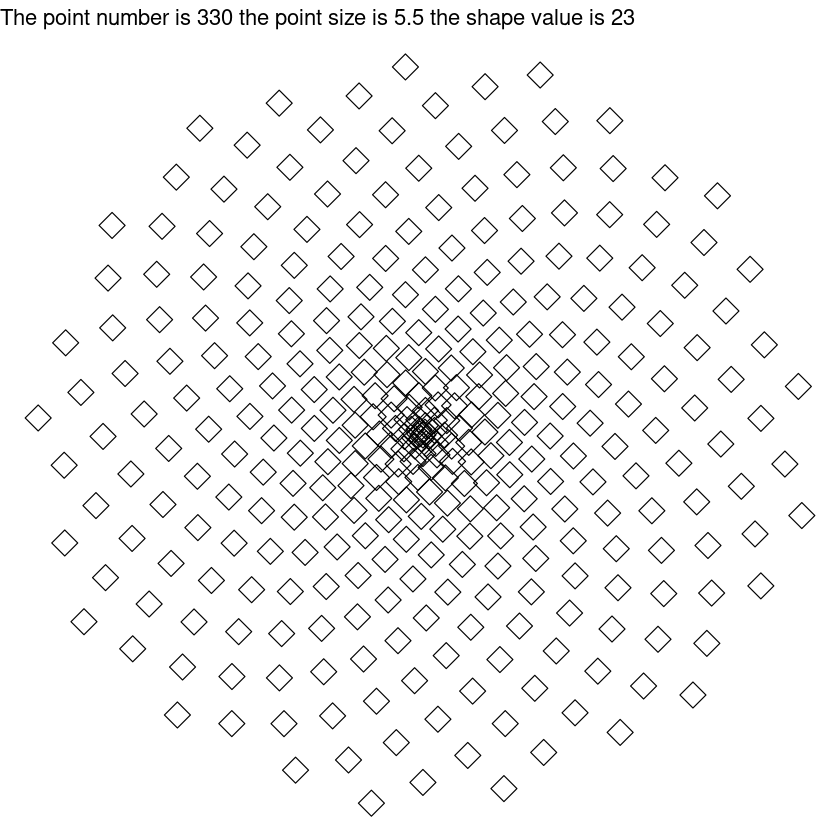

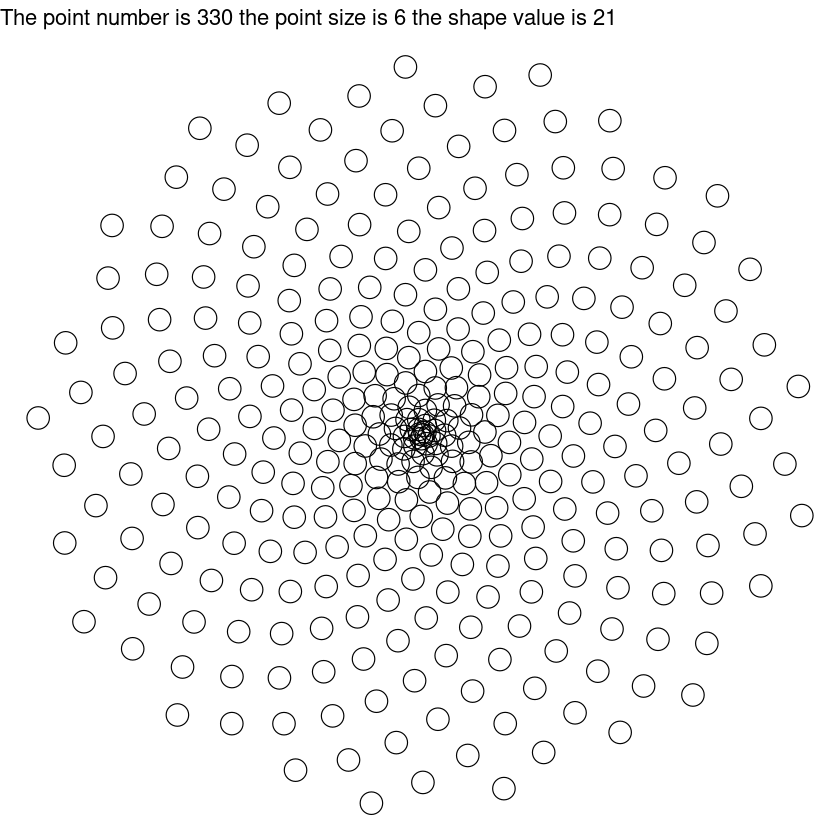

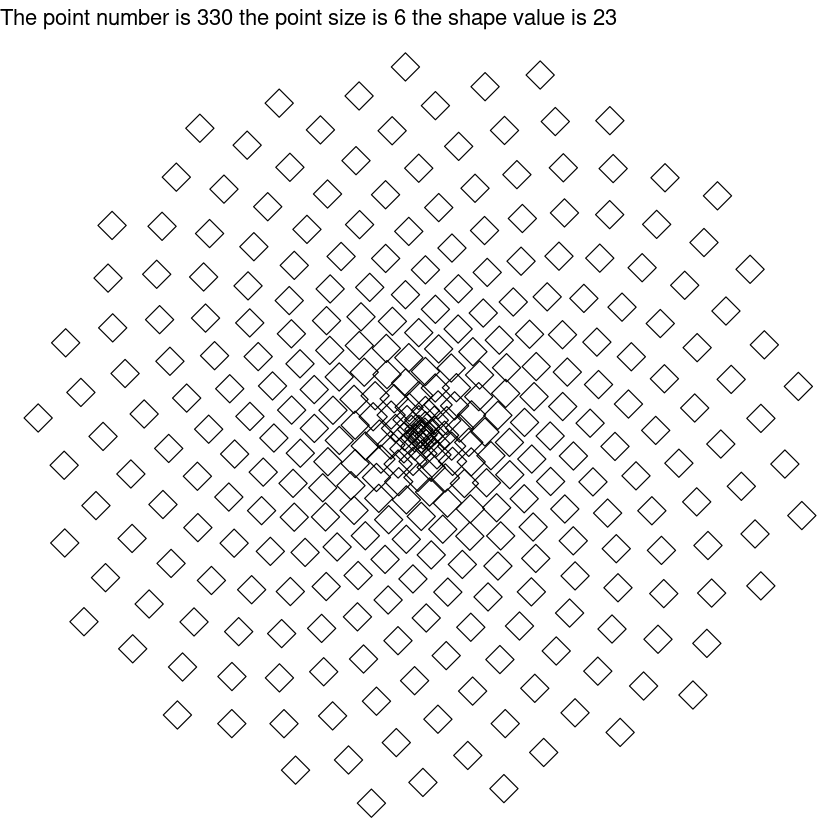

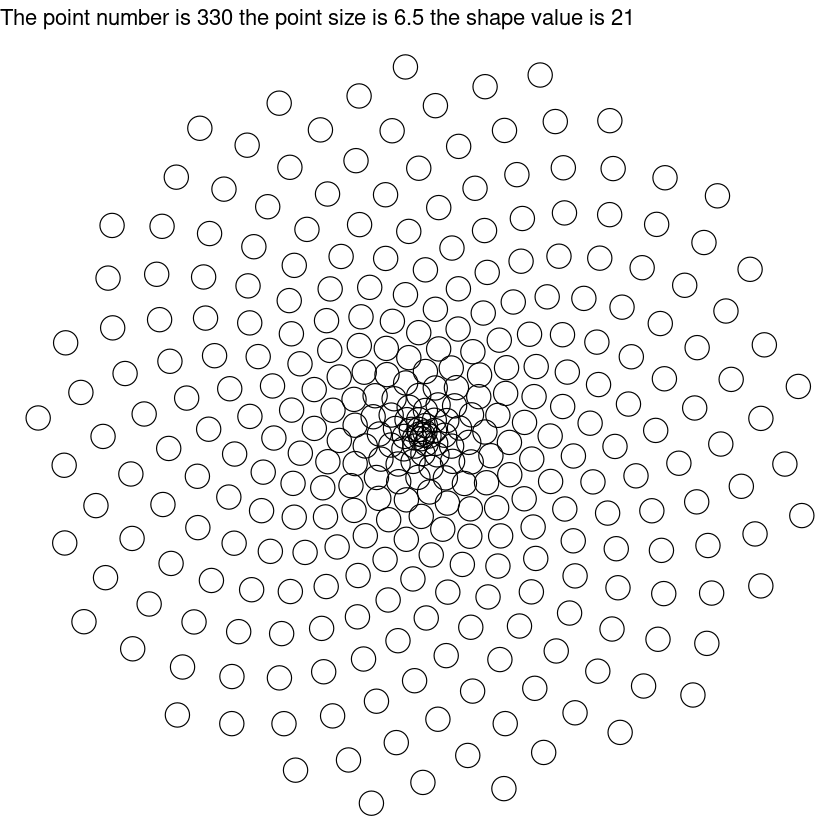

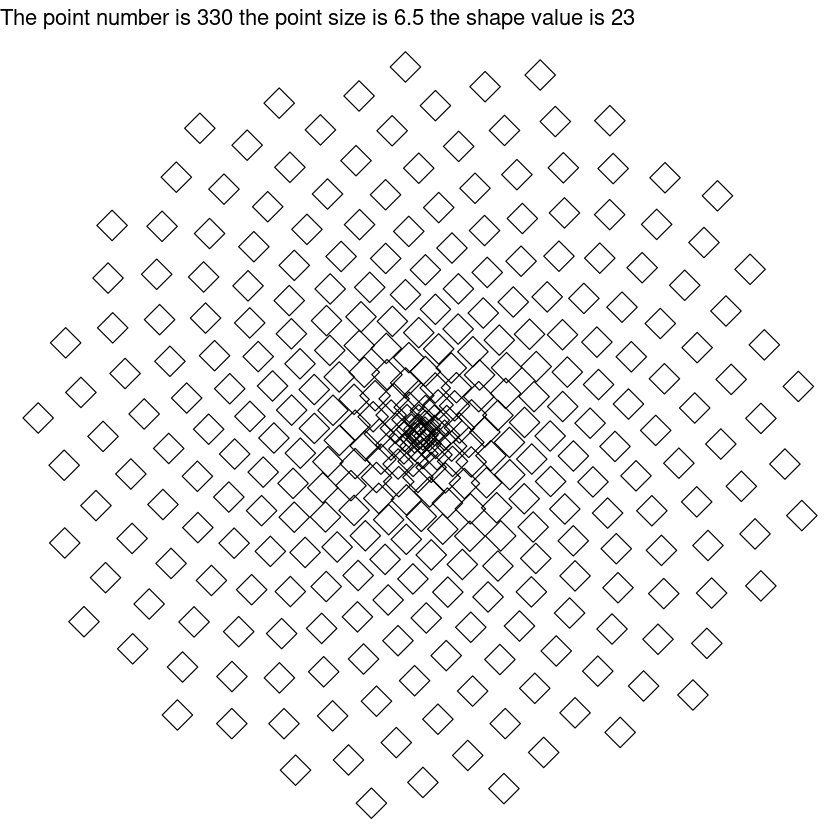

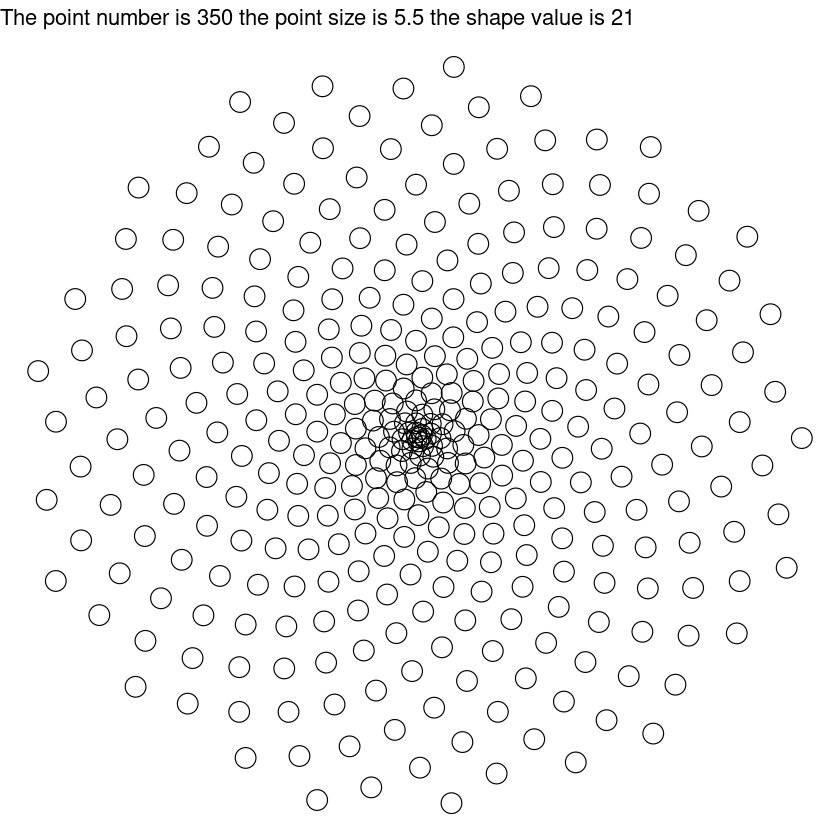

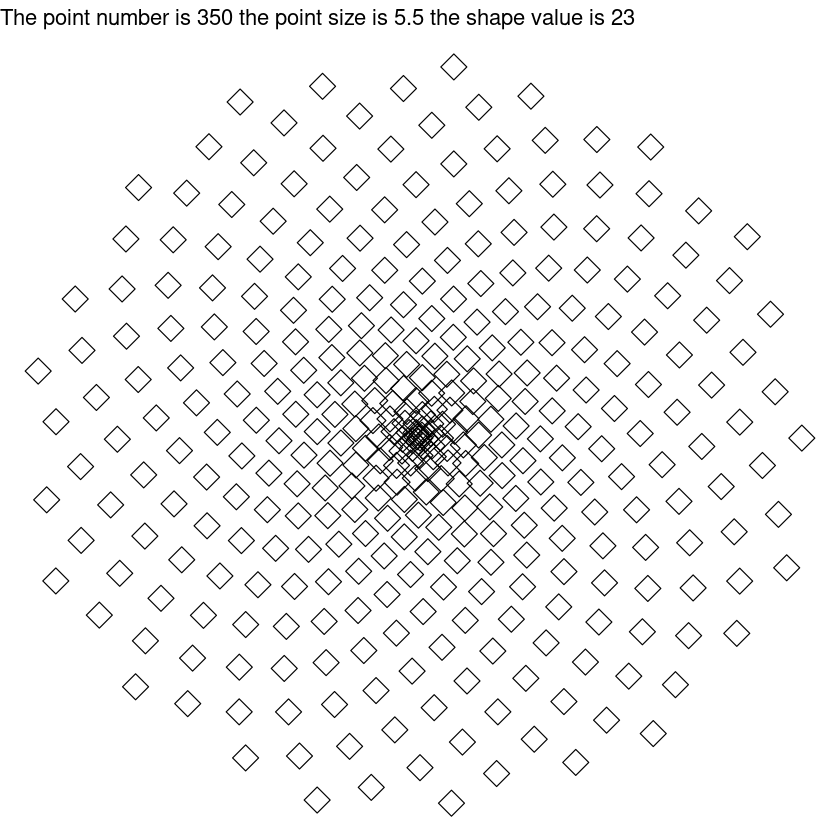

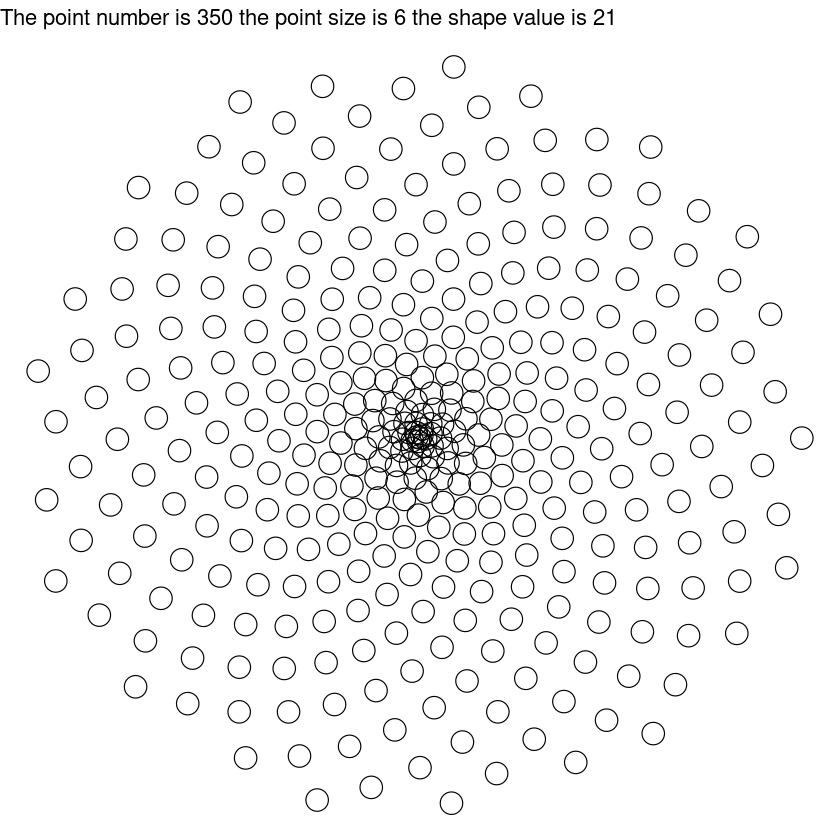

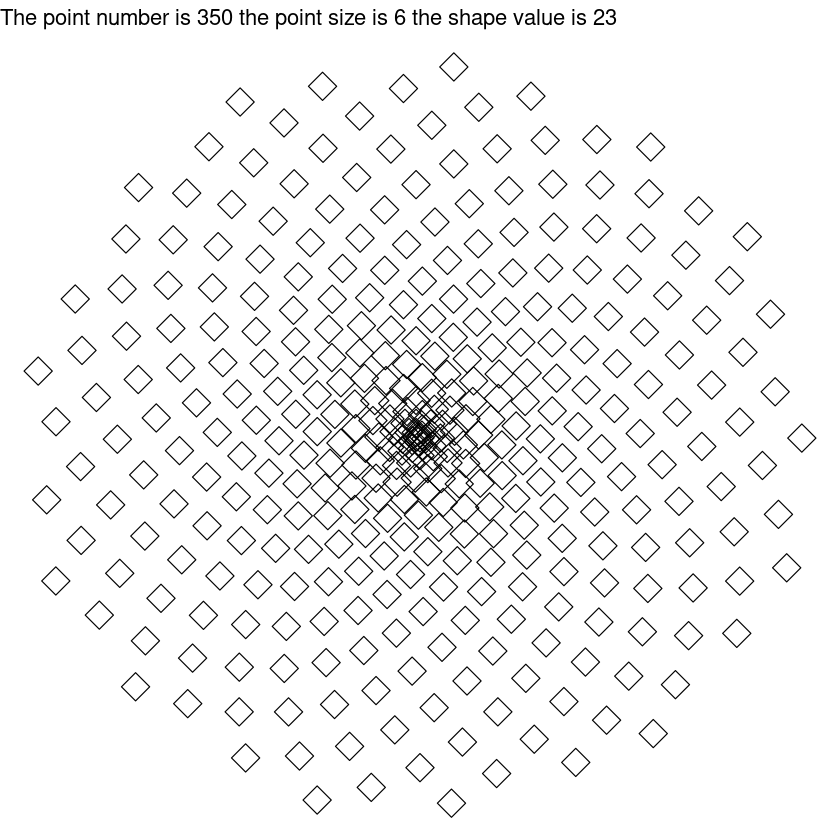

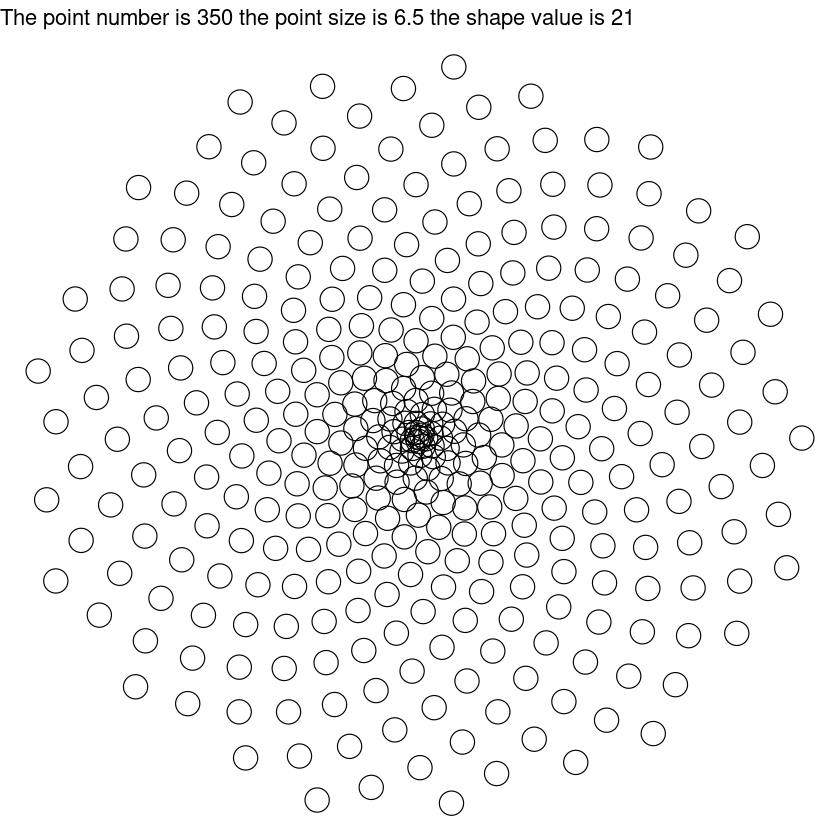

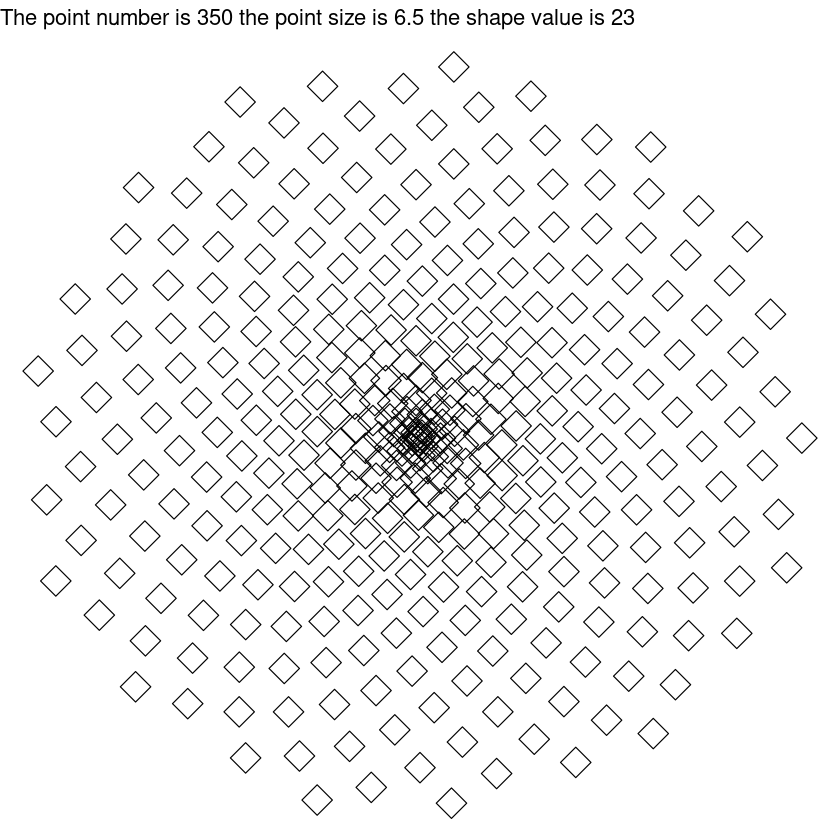

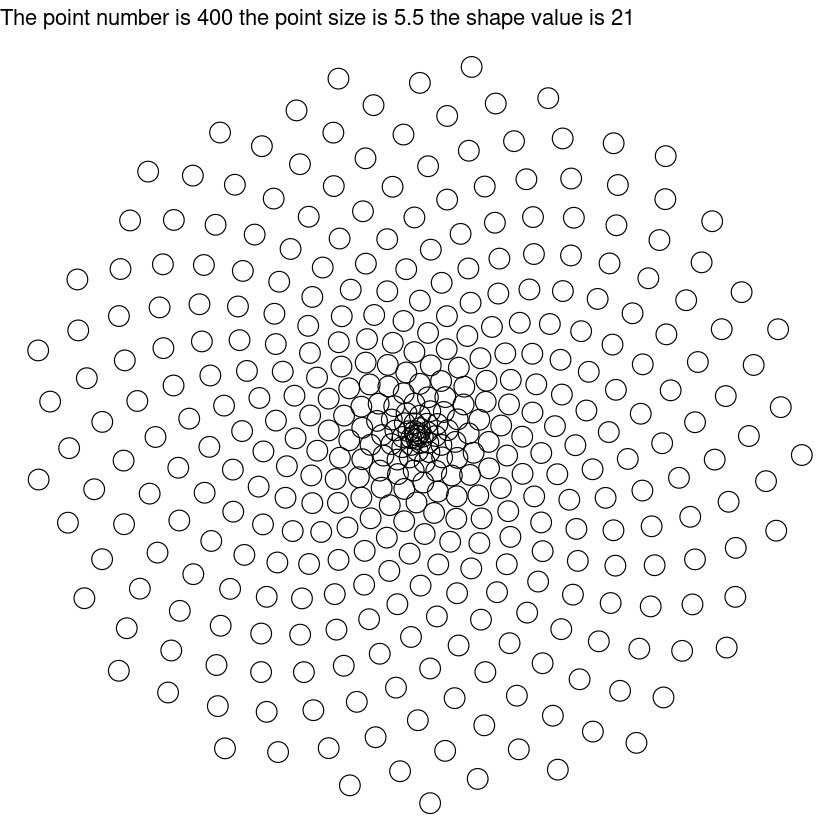

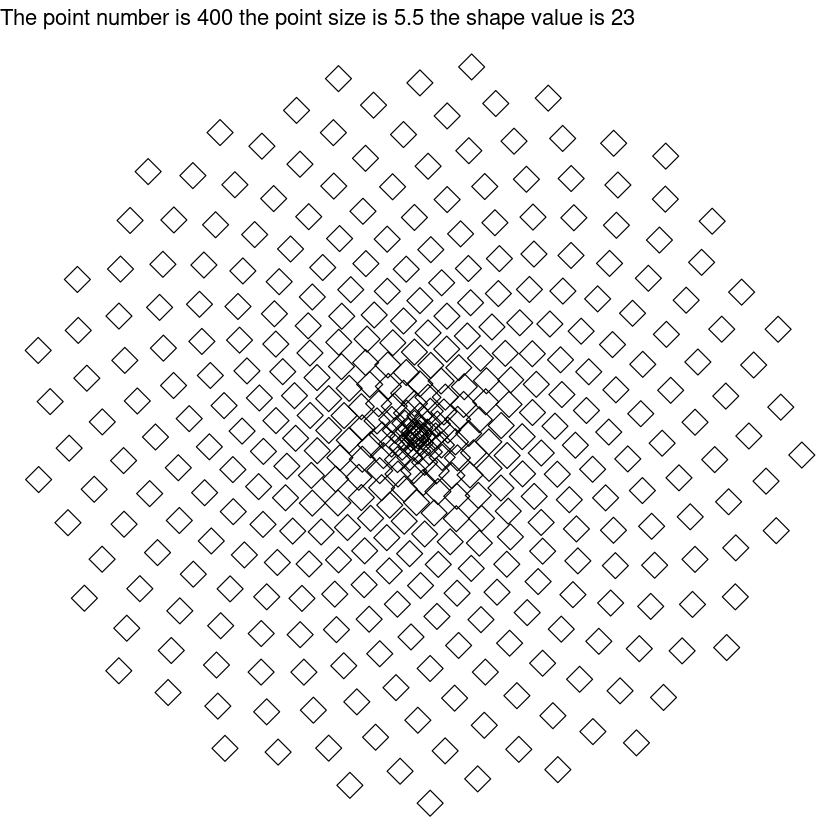

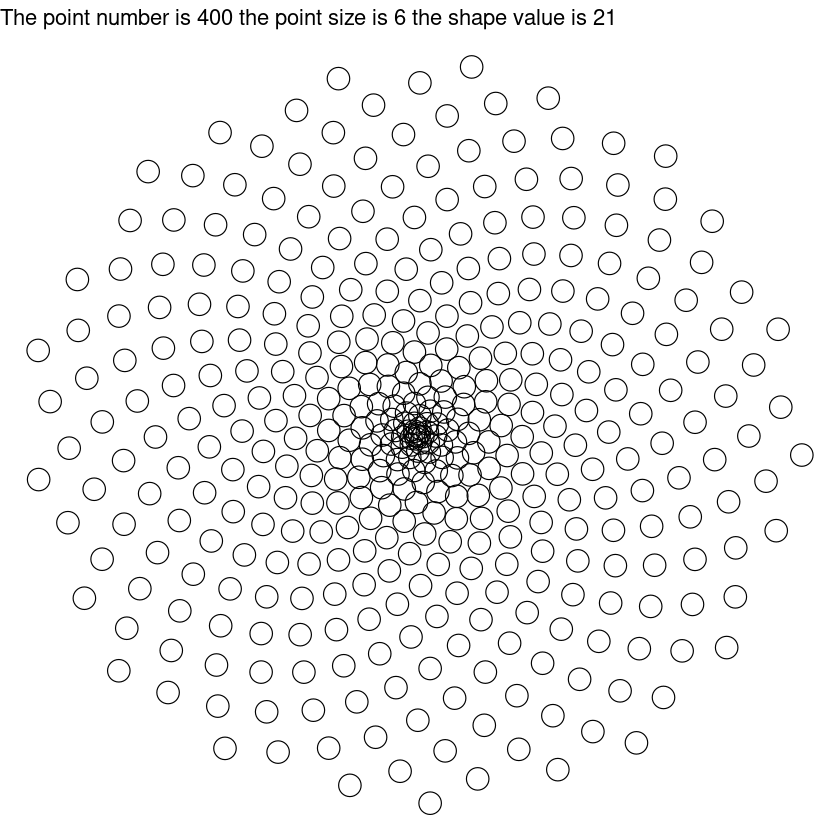

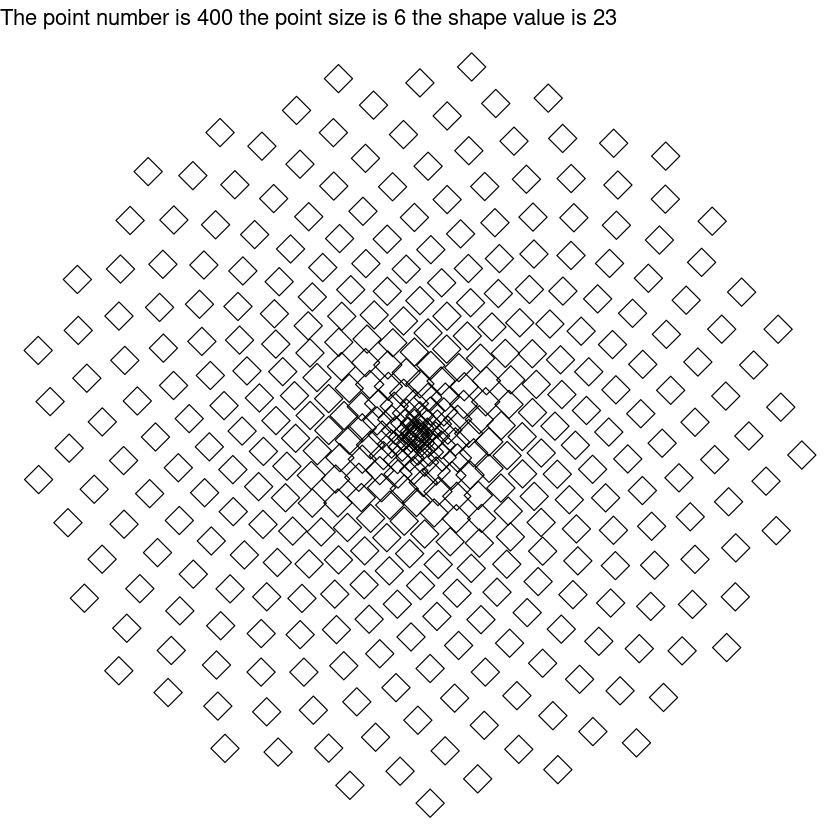

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]


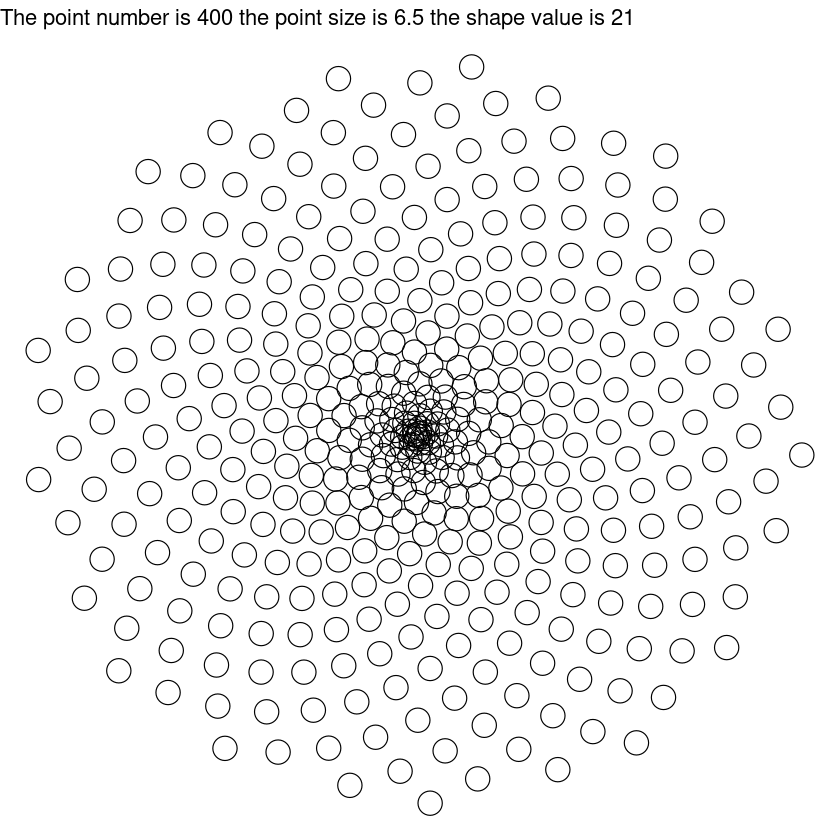

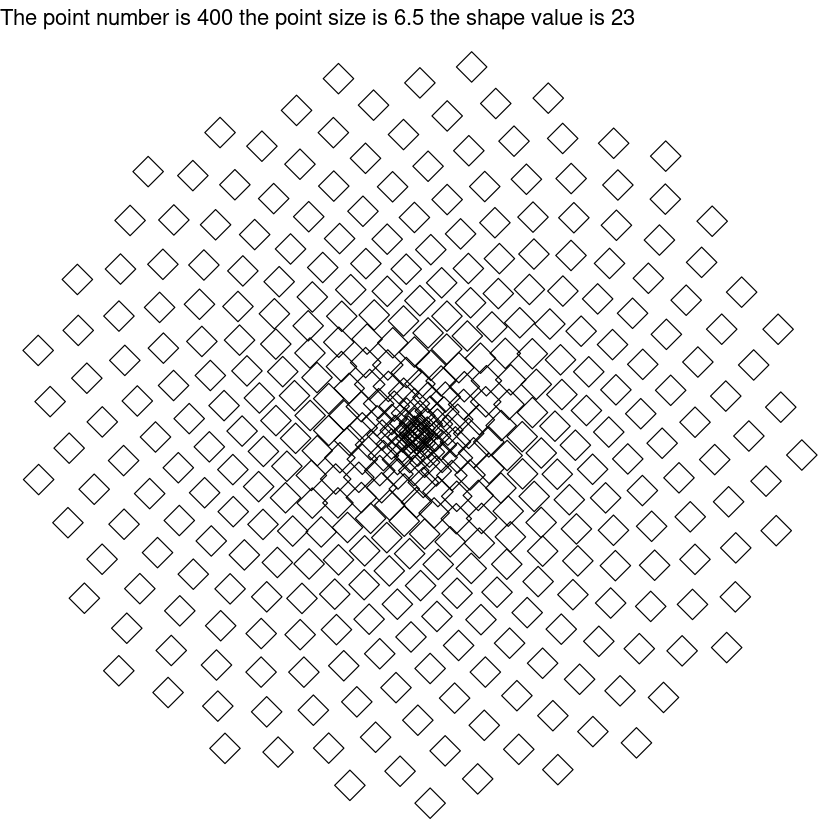

In [7]:
# load the function to draw the flower plots
flower_graph <- function(point_value, size_value, shape_value) {
  flowers <- list()
  for (points in point_value) {
	  for (sizes in size_value) {
		  for (shapes in shape_value) {
			      # Define the Golden Angle
    				angle <- pi * (3 - sqrt(5))

    				t <- (1:points) * angle
    				x <- sin(t)
    				y <- cos(t)
    				df <- data.frame(t, x, y)

    				flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      				geom_point(size = sizes, shape = shapes) +
			  		labs(title = paste0("The point number is ", points, " the point size is ", sizes, " the shape value is ", shapes)) +
      				theme_void()

    				flowers[[length(flowers) + 1]] <- flower
		  }
	  }
  }
  
  return(flowers)
}

# iterate through different point counts
point_counts <- c(300, 330, 350, 400)
size_counts <- c(5.5, 6, 6.5)
shape_counts <- c(21, 23)

flower_graph(point_counts, size_counts, shape_counts)

Point number of 330, point size of 6, point shape of 21 is so far the most appeacling to me. 

---

## Step 5: Add color and transparency

The plot so far:

[[1]]


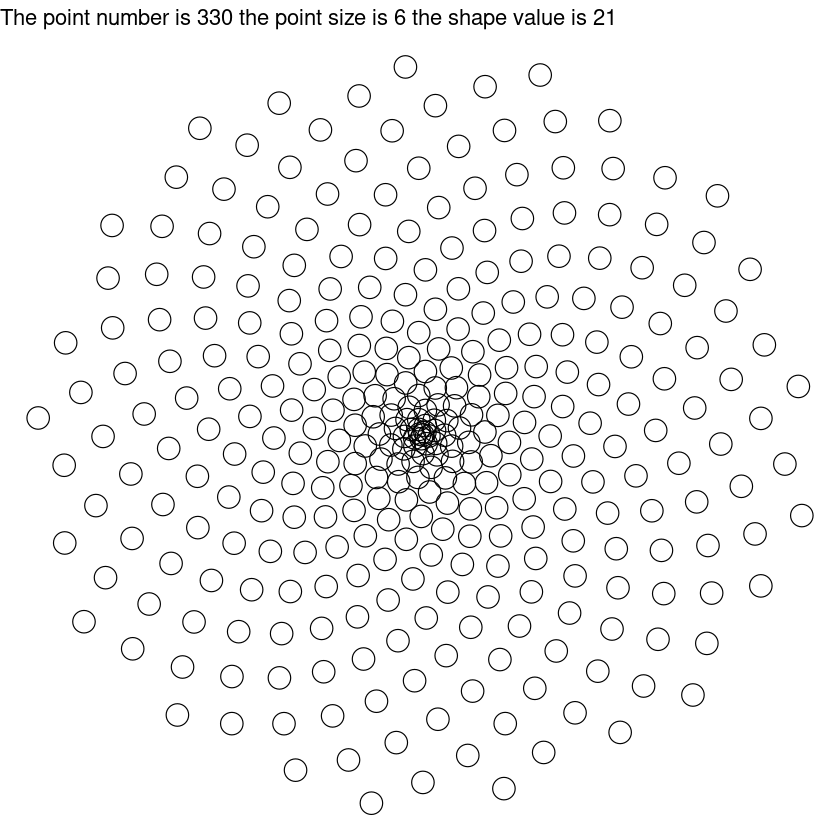

In [8]:
# load the function to draw the flower plots
flower_graph <- function(point_value, size_value, shape_value) {
  flowers <- list()
  for (points in point_value) {
	  for (sizes in size_value) {
		  for (shapes in shape_value) {
			      # Define the Golden Angle
    				angle <- pi * (3 - sqrt(5))

    				t <- (1:points) * angle
    				x <- sin(t)
    				y <- cos(t)
    				df <- data.frame(t, x, y)

    				flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      				geom_point(size = sizes, shape = shapes) +
			  		labs(title = paste0("The point number is ", points, " the point size is ", sizes, " the shape value is ", shapes)) +
      				theme_void()

    				flowers[[length(flowers) + 1]] <- flower
		  }
	  }
  }
  
  return(flowers)
}

flower_graph(330, 6, 21)

I'd like to have a color gradient in there, going from dark blue to a light blue at the edges of the flower petals, with an orange pistil in the middle. 

First test: uni-colored plot, here in darkblue.

[[1]]


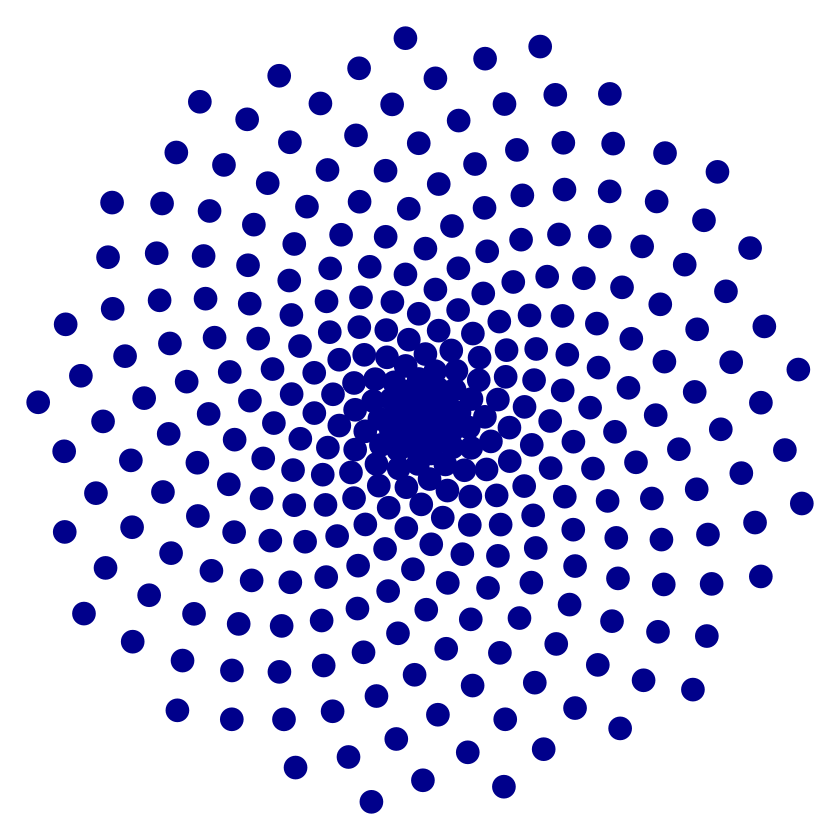

In [4]:
# load the function to draw the flower plots
flower_graph <- function(point_value, size_value, shape_value) {
  flowers <- list()
  for (points in point_value) {
	  for (sizes in size_value) {
		  for (shapes in shape_value) {
			      # Define the Golden Angle
    				angle <- pi * (3 - sqrt(5))

    				t <- (1:points) * angle
    				x <- sin(t)
    				y <- cos(t)
    				df <- data.frame(t, x, y)

    				flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      				geom_point(size = sizes, shape = shapes, colour = "darkblue", fill = "darkblue") +
			  		theme_void()

    				flowers[[length(flowers) + 1]] <- flower
		  }
	  }
  }
  
  return(flowers)
}

flower_graph(330, 6, 21)

Point size seems a little small after all, increase it to 7:

[[1]]


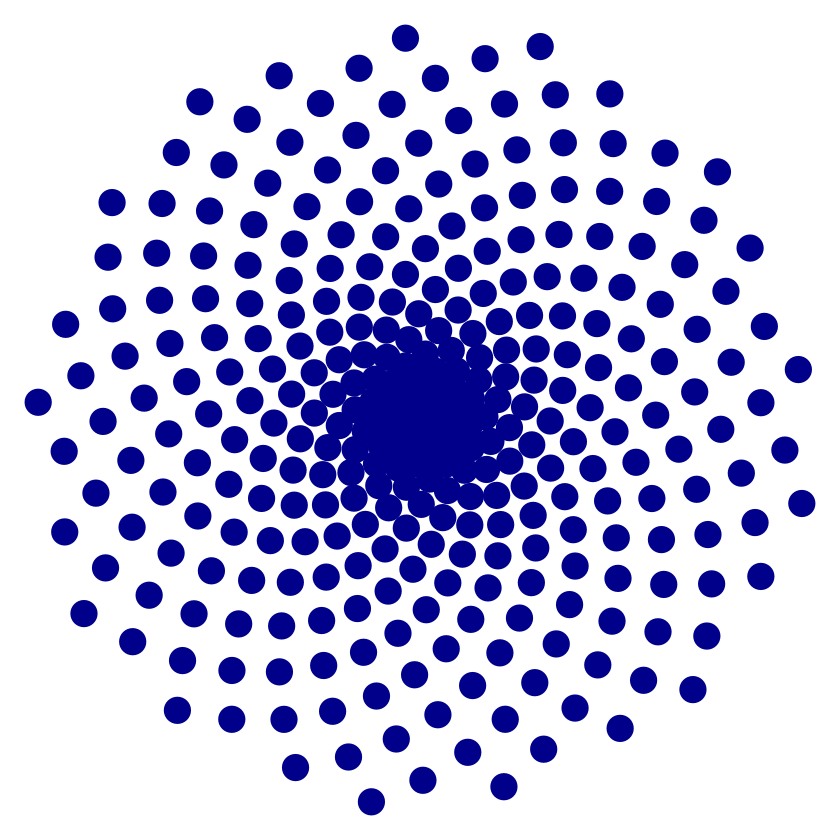

In [5]:
# load the function to draw the flower plots
flower_graph <- function(point_value, size_value, shape_value) {
  flowers <- list()
  for (points in point_value) {
	  for (sizes in size_value) {
		  for (shapes in shape_value) {
			      # Define the Golden Angle
    				angle <- pi * (3 - sqrt(5))

    				t <- (1:points) * angle
    				x <- sin(t)
    				y <- cos(t)
    				df <- data.frame(t, x, y)

    				flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      				geom_point(size = sizes, shape = shapes, colour = "darkblue", fill = "darkblue") +
			  		#labs(title = paste0("The point number is ", points, " the point size is ", sizes, " the shape value is ", shapes)) +
      				theme_void()

    				flowers[[length(flowers) + 1]] <- flower
		  }
	  }
  }
  
  return(flowers)
}

flower_graph(330, 7, 21)

To make the gradient, I'll separate the dots in different zones and assign colors amd transparancies to them. 

[[1]]


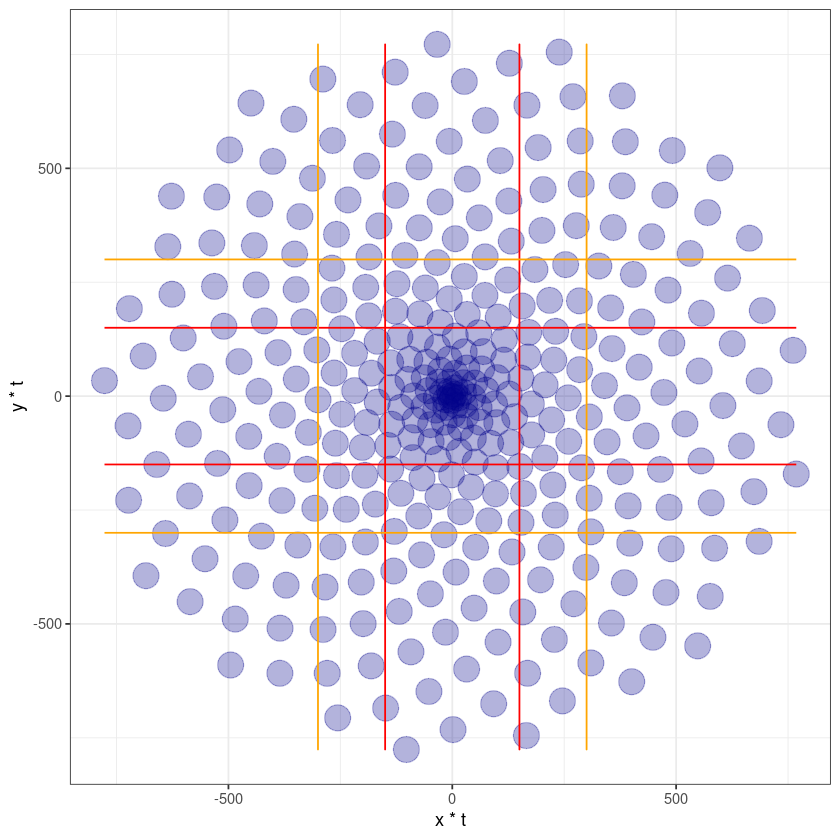

In [14]:
# load the function to draw the flower plots
flower_graph <- function(point_value, size_value, shape_value) {
  flowers <- list()
  for (points in point_value) {
	  for (sizes in size_value) {
		  for (shapes in shape_value) {
			      # Define the Golden Angle
    				angle <- pi * (3 - sqrt(5))

    				t <- (1:points) * angle
    				x <- sin(t)
    				y <- cos(t)
    		  df <- data.frame(t, x, y)

    		  flower <- ggplot(df, aes(x = x*t, y = y*t)) +
      		  geom_point(size = sizes, shape = shapes, colour = "darkblue", fill = "darkblue", alpha = 0.3) +
			  geom_line(aes(y= -150), color = "red") +
			  geom_line(aes(y= 150), color = "red") +
			  geom_line(aes(x= -150), color = "red") +
			  geom_line(aes(x= 150), color = "red") +
			  geom_line(aes(y= -300), color = "orange") +
			  geom_line(aes(y= 300), color = "orange") +
			  geom_line(aes(x= -300), color = "orange") +
			  geom_line(aes(x= 300), color = "orange") +
			  theme_bw()

    		  flowers[[length(flowers) + 1]] <- flower
		  }
	  }
  }
  
  return(flowers)
}

flower_graph(330, 7, 21)

The points contained within -150 and 150 on both the x and y axis, indicated by the red quadrant, will be the flower pistil and colored in dark orange.  
Everything else will be colored blue, with the dots in the orange quadrant in a dark blue, and the ones outside getting lighter by applying increasing transparency to them. 

I assign extra columns in the foundation dataset for this. 

In [2]:
# generation of datapoints, as before
points <- 330
angle <- pi * (3 - sqrt(5))

t <- (1:points) * angle
x <- sin(t)
y <- cos(t)
df <- data.frame(t, x, y)


In [14]:
# what is plotted is not x and y, but x*t and y*t. I'll assign this to new variables x_new and y_new, to make the subsequent categorization less cumbersome. 
df$x_new <- x * t
df$y_new <- y * t

df

t         x            y           x_new       y_new      flower_color
1    2.399963  0.67549029  -0.73736888   1.621152   -1.769658 blue        
2    4.799926 -0.99617104   0.08742572  -4.781548    0.419637 blue        
3    7.199890  0.79360075   0.60843886   5.713838    4.380693 blue        
4    9.599853 -0.17418195  -0.98471349  -1.672121   -9.453105 blue        
5   11.999816 -0.53672805   0.84375529  -6.440638   10.124908 blue        
6   14.399779  0.96571507  -0.25960430  13.906084   -3.738245 blue        
7   16.799743 -0.88744843  -0.46090702 -14.908905   -7.743119 blue        
8   19.199706  0.34303863   0.93932130   6.586241   18.034693 blue        
9   21.599669  0.38155641  -0.92434556   8.241492  -19.965558 blue        
10  23.999632 -0.90573427   0.42384600 -21.737290   10.172148 blue        
11  26.399596  0.95416412   0.29928386  25.189547    7.900973 blue        
12  28.799559 -0.50140758  -0.86521121 -14.440317  -24.917701 blue        
13  31.199522 -0.21471943   0.97667577  -6.699144   30.471817 blue        
14  33.599485  0.81806243  -0.57512943  27.486477  -19.324053 blue        
15  35.999448 -0.99170812  -0.12851069 -35.700945   -4.626314 blue        
16  38.399412  0.64444698   0.76464900  24.746385   29.362072 blue        
17  40.799375  0.04131783  -0.99914605   1.685741  -40.764534 blue        
18  43.199338 -0.70537994   0.70882941 -30.471947   30.620962 blue        
19  45.599301  0.99893261  -0.04619145  45.550629   -2.106298 blue        
20  47.999265 -0.76778369  -0.64070914 -36.853052  -30.753568 blue        
21  50.399228  0.13334699   0.99106941   6.720585   49.949133 blue        
22  52.799191  0.57113185  -0.82085834  30.155300  -43.340656 blue        
23  55.199154 -0.97561669   0.21948137 -53.853216   12.115186 blue        
24  57.599118  0.86764692   0.49718087  49.975697   28.637180 blue        
25  59.999081 -0.30393498  -0.95269278 -18.235819  -57.160691 blue        
26  62.399044 -0.41942253   0.90779113 -26.171565   56.645299 blue        
27  64.799007  0.92247322  -0.38606108  59.775349  -25.016375 blue        
28  67.198970 -0.94098356  -0.33845228 -63.233126  -22.743645 blue        
29  69.598934  0.46523076   0.88518944  32.379565   61.608241 blue        
30  71.998897  0.25489019  -0.96697001  18.351813  -69.620774 blue        
⋮   ⋮         ⋮            ⋮           ⋮           ⋮          ⋮           
301 722.3889  -0.176449497  0.98430969 -127.465164  711.05443 blue        
302 724.7889   0.795000013 -0.60660941  576.207181 -439.66377 blue        
303 727.1889  -0.995967038 -0.08971989 -724.256134  -65.24331 blue        
304 729.5888   0.673790182  0.73892272  491.589785  539.10976 blue        
305 731.9888   0.002303217 -0.99999735    1.685929 -731.98684 blue        
306 734.3887  -0.677186823  0.73581112 -497.318383  540.37141 blue        
307 736.7887   0.996369759 -0.08513109  734.113991  -62.72363 blue        
308 739.1887  -0.792197280 -0.61026508 -585.583257 -451.10104 blue        
309 741.5886   0.171913479  0.98511205  127.489083  730.54791 blue        
310 743.9886   0.538669981 -0.84251686  400.764325 -626.82294 blue        
311 746.3886  -0.966310438  0.25737936 -721.243061  192.10501 blue        
312 748.7885   0.886384506  0.46294979  663.714550  346.65149 blue        
313 751.1885  -0.340874260 -0.94010890 -256.060821 -706.19898 blue        
314 753.5885  -0.383684365  0.92346430 -289.140107  695.91203 blue        
315 755.9884   0.906708080 -0.42175877  685.460806 -318.84474 blue        
316 758.3884  -0.953472274 -0.30148072 -723.102294 -228.63947 blue        
317 760.7883   0.499413482  0.86636377  379.947956  659.11945 blue        
318 763.1883   0.216968356 -0.97617864  165.587712 -745.00812 blue        
319 765.5883  -0.819384908  0.57324373 -627.311475  438.86867 blue        
320 767.9882   0.991409505  0.13079447  761.390835  100.44861 blue        
321 770.3882  -0.642684121 -0.76613127 -495.116261 -590.21849 blue        
322 772.7882  -0.043618967  0

Variable curation was successful. I'll assign the colors and transparencies in the subsequent step.

In [23]:
# color
df$flower_color <- "darkblue"
df$flower_color[between(df$x_new, -150, 150) & between(df$y_new, -150, 150)] <- "orange"

# transparency
df$transp_value <- 0.2
df$transp_value[between(df$x_new, -750, 750) & between(df$y_new, -750, 750)] <- 0.3
df$transp_value[between(df$x_new, -650, 650) & between(df$y_new, -650, 650)] <- 0.4
df$transp_value[between(df$x_new, -600, 600) & between(df$y_new, -600, 600)] <- 0.5
df$transp_value[between(df$x_new, -550, 550) & between(df$y_new, -550, 550)] <- 0.6
df$transp_value[between(df$x_new, -450, 450) & between(df$y_new, -450, 450)] <- 0.7
df$transp_value[between(df$x_new, -400, 400) & between(df$y_new, -400, 400)] <- 0.8
df$transp_value[between(df$x_new, -350, 350) & between(df$y_new, -350, 350)] <- 0.9
df$transp_value[between(df$x_new, -300, 300) & between(df$y_new, -300, 300)] <- 1.0
# alpha =1 for the orange part was a bit too dense, changed it to 0.7 instead
df$transp_value[between(df$x_new, -150, 150) & between(df$y_new, -150, 150)] <- 0.7

# check entries
df

t         x            y           x_new       y_new      flower_color
1    2.399963  0.67549029  -0.73736888   1.621152   -1.769658 orange      
2    4.799926 -0.99617104   0.08742572  -4.781548    0.419637 orange      
3    7.199890  0.79360075   0.60843886   5.713838    4.380693 orange      
4    9.599853 -0.17418195  -0.98471349  -1.672121   -9.453105 orange      
5   11.999816 -0.53672805   0.84375529  -6.440638   10.124908 orange      
6   14.399779  0.96571507  -0.25960430  13.906084   -3.738245 orange      
7   16.799743 -0.88744843  -0.46090702 -14.908905   -7.743119 orange      
8   19.199706  0.34303863   0.93932130   6.586241   18.034693 orange      
9   21.599669  0.38155641  -0.92434556   8.241492  -19.965558 orange      
10  23.999632 -0.90573427   0.42384600 -21.737290   10.172148 orange      
11  26.399596  0.95416412   0.29928386  25.189547    7.900973 orange      
12  28.799559 -0.50140758  -0.86521121 -14.440317  -24.917701 orange      
13  31.199522 -0.21471943   0.97667577  -6.699144   30.471817 orange      
14  33.599485  0.81806243  -0.57512943  27.486477  -19.324053 orange      
15  35.999448 -0.99170812  -0.12851069 -35.700945   -4.626314 orange      
16  38.399412  0.64444698   0.76464900  24.746385   29.362072 orange      
17  40.799375  0.04131783  -0.99914605   1.685741  -40.764534 orange      
18  43.199338 -0.70537994   0.70882941 -30.471947   30.620962 orange      
19  45.599301  0.99893261  -0.04619145  45.550629   -2.106298 orange      
20  47.999265 -0.76778369  -0.64070914 -36.853052  -30.753568 orange      
21  50.399228  0.13334699   0.99106941   6.720585   49.949133 orange      
22  52.799191  0.57113185  -0.82085834  30.155300  -43.340656 orange      
23  55.199154 -0.97561669   0.21948137 -53.853216   12.115186 orange      
24  57.599118  0.86764692   0.49718087  49.975697   28.637180 orange      
25  59.999081 -0.30393498  -0.95269278 -18.235819  -57.160691 orange      
26  62.399044 -0.41942253   0.90779113 -26.171565   56.645299 orange      
27  64.799007  0.92247322  -0.38606108  59.775349  -25.016375 orange      
28  67.198970 -0.94098356  -0.33845228 -63.233126  -22.743645 orange      
29  69.598934  0.46523076   0.88518944  32.379565   61.608241 orange      
30  71.998897  0.25489019  -0.96697001  18.351813  -69.620774 orange      
⋮   ⋮         ⋮            ⋮           ⋮           ⋮          ⋮           
301 722.3889  -0.176449497  0.98430969 -127.465164  711.05443 darkblue    
302 724.7889   0.795000013 -0.60660941  576.207181 -439.66377 darkblue    
303 727.1889  -0.995967038 -0.08971989 -724.256134  -65.24331 darkblue    
304 729.5888   0.673790182  0.73892272  491.589785  539.10976 darkblue    
305 731.9888   0.002303217 -0.99999735    1.685929 -731.98684 darkblue    
306 734.3887  -0.677186823  0.73581112 -497.318383  540.37141 darkblue    
307 736.7887   0.996369759 -0.08513109  734.113991  -62.72363 darkblue    
308 739.1887  -0.792197280 -0.61026508 -585.583257 -451.10104 darkblue    
309 741.5886   0.171913479  0.98511205  127.489083  730.54791 darkblue    
310 743.9886   0.538669981 -0.84251686  400.764325 -626.82294 darkblue    
311 746.3886  -0.966310438  0.25737936 -721.243061  192.10501 darkblue    
312 748.7885   0.886384506  0.46294979  663.714550  346.65149 darkblue    
313 751.1885  -0.340874260 -0.94010890 -256.060821 -706.19898 darkblue    
314 753.5885  -0.383684365  0.92346430 -289.140107  695.91203 darkblue    
315 755.9884   0.906708080 -0.42175877  685.460806 -318.84474 darkblue    
316 758.3884  -0.953472274 -0.30148072 -723.102294 -228.63947 darkblue    
317 760.7883   0.499413482  0.86636377  379.947956  659.11945 darkblue    
318 763.1883   0.216968356 -0.97617864  165.587712 -745.00812 darkblue    
319 765.5883  -0.819384908  0.57324373 -627.311475  438.86867 darkblue    
320 767.9882   0.991409505  0.13079447  761.390835  100.44861 darkblue    
321 770.3882  -0.642684121 -0.76613127 -495.116261 -590.21849 darkblue    
322 772.7882  -0.043618967  0

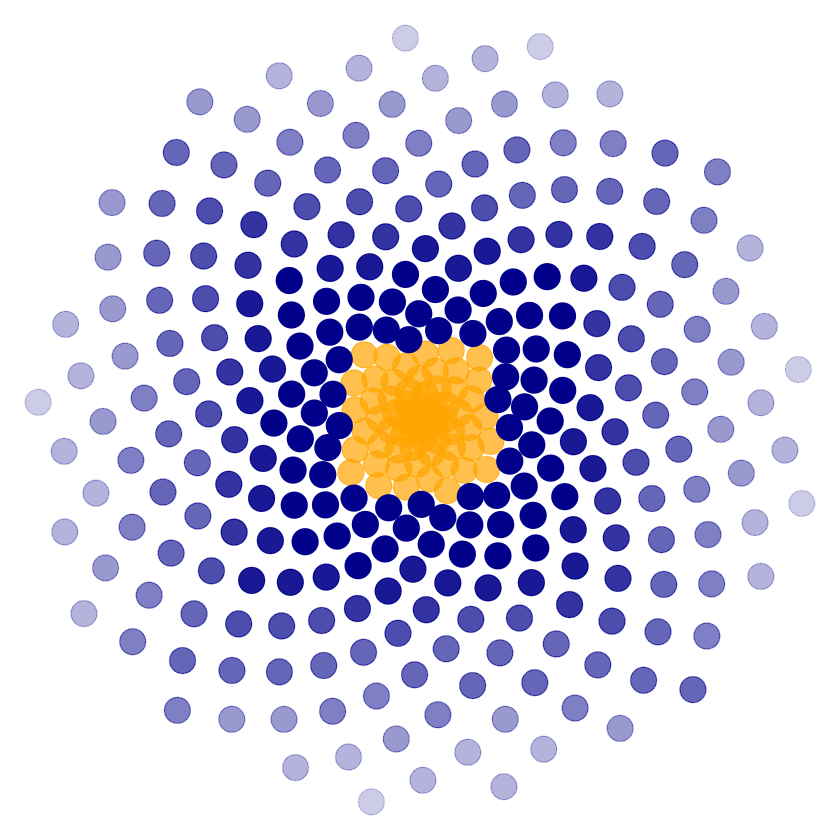

In [26]:
flower <- ggplot(df, aes(x = x_new, y = y_new)) +
      	  geom_point(size = 7, shape = 21, colour = df$flower_color, fill = df$flower_color, alpha = df$transp_value) +
		  theme_void()
flower